In [129]:
import pandas as pd   
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from imblearn.over_sampling import SMOTE


In [130]:
df=pd.read_excel('./datasets/sleep_apnea_data.xlsx')  
df

,Gender,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,AHI
0,M,0.0,14.0,29.065927,88.0,174.0,57.500000,39.0,95.5,106.5,20.0,2.903226
1,M,0.0,8.0,26.989619,78.0,170.0,57.000000,36.5,90.0,100.0,20.0,1.022727
2,M,0.0,16.0,23.939481,75.0,177.0,59.000000,39.0,88.0,104.0,20.0,0.518359
3,M,0.0,15.0,22.129740,67.0,174.0,57.000000,35.0,74.0,94.0,20.0,0.559006
4,M,0.0,15.0,22.129740,67.0,174.0,57.000000,35.0,74.0,94.0,20.0,0.559006
...,...,...,...,...,...,...,...,...,...,...,...,...
5240,F,1.0,6.0,24.005487,63.0,162.0,57.000000,33.0,99.0,101.5,77.0,35.960000
5241,F,0.0,13.0,29.964328,63.0,145.0,53.000000,35.8,102.0,112.0,77.0,31.640000
5242,F,0.0,13.0,29.964328,63.0,145.0,53.000000,35.8,102.0,112.0,77.0,31.640000
5243,F,0.0,0.0,24.654832,60.0,156.0,54.500000,35.0,83.5,99.0,79.0,35.110000


In [131]:
print ('Rows     : ', df.shape[0]) 
print ('Columns  : ', df.shape[1])
print ('\nFeatures : \n', df.columns.tolist())
print ('\nMissing values :  ', df.isnull().sum().values.sum())
print ('\nUnique values :  \n', df.nunique())

Rows     :  5245
Columns  :  12

Features : 
 ['Gender', 'BQ', 'ESS', 'BMI', 'Weight', 'Height', 'Head', 'Neck', 'Waist', 'Buttock', 'Age', 'AHI']

Missing values :   5

Unique values :  
 Gender        2
BQ            4
ESS          31
BMI        2092
Weight      441
Height      120
Head        127
Neck        169
Waist       262
Buttock     212
Age          63
AHI        4387
dtype: int64


In [132]:
df = df.dropna()
df.info()
print ('\nMissing values :  ', df.isnull().sum().values.sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5241 entries, 0 to 5244
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Gender   5241 non-null   object 
 1   BQ       5241 non-null   float64
 2   ESS      5241 non-null   float64
 3   BMI      5241 non-null   float64
 4   Weight   5241 non-null   float64
 5   Height   5241 non-null   float64
 6   Head     5241 non-null   float64
 7   Neck     5241 non-null   float64
 8   Waist    5241 non-null   float64
 9   Buttock  5241 non-null   float64
 10  Age      5241 non-null   float64
 11  AHI      5241 non-null   float64
dtypes: float64(11), object(1)
memory usage: 532.3+ KB

Missing values :   0


In [133]:
df.describe()

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,AHI
count,5241.000000,5241.000000,5241.000000,5241.000000,5241.000000,5241.000000,5241.000000,5241.000000,5241.000000,5241.000000,5241.000000
mean,0.231826,10.177829,26.614692,75.509101,168.048941,56.433686,37.700609,91.202232,100.878859,45.359015,31.577799
std,0.442350,20.194986,5.353710,17.432065,8.150325,2.286324,4.195294,13.805898,9.733455,13.107217,28.132234
min,0.000000,0.000000,14.765497,37.000000,140.000000,36.500000,26.000000,56.000000,70.000000,20.000000,0.000000
25%,0.000000,6.000000,23.120624,64.000000,163.000000,55.000000,35.000000,83.000000,95.000000,35.000000,6.333333
50%,0.000000,10.000000,25.795918,74.000000,169.000000,56.500000,37.500000,90.000000,99.500000,44.000000,23.883495
75%,0.000000,14.000000,29.012346,85.000000,174.000000,58.000000,40.000000,98.500000,105.000000,55.000000,52.720000
max,9.000000,999.000000,60.232426,178.000000,198.000000,69.500000,60.000000,182.000000,179.000000,80.000000,143.922830


In [134]:
dummies = pd.get_dummies(df.Gender)
dummies

,F,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
5240,1,0
5241,1,0
5242,1,0
5243,1,0


In [135]:
merged = pd.concat([df,dummies],axis='columns')
final = merged.drop(['Gender'], axis='columns')
final = final.drop(['F'], axis='columns')
final

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,AHI,M
0,0.0,14.0,29.065927,88.0,174.0,57.500000,39.0,95.5,106.5,20.0,2.903226,1
1,0.0,8.0,26.989619,78.0,170.0,57.000000,36.5,90.0,100.0,20.0,1.022727,1
2,0.0,16.0,23.939481,75.0,177.0,59.000000,39.0,88.0,104.0,20.0,0.518359,1
3,0.0,15.0,22.129740,67.0,174.0,57.000000,35.0,74.0,94.0,20.0,0.559006,1
4,0.0,15.0,22.129740,67.0,174.0,57.000000,35.0,74.0,94.0,20.0,0.559006,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5240,1.0,6.0,24.005487,63.0,162.0,57.000000,33.0,99.0,101.5,77.0,35.960000,0
5241,0.0,13.0,29.964328,63.0,145.0,53.000000,35.8,102.0,112.0,77.0,31.640000,0
5242,0.0,13.0,29.964328,63.0,145.0,53.000000,35.8,102.0,112.0,77.0,31.640000,0
5243,0.0,0.0,24.654832,60.0,156.0,54.500000,35.0,83.5,99.0,79.0,35.110000,0


In [136]:
def AHILabel(num):   
    if num>=30: 
        return 3
    elif num in range (15,30):
        return 2
    elif num in range (5,15):
        return 1
    else:
        return 0

In [137]:
final['AHILabel']=final.AHI.apply(AHILabel)
status=["Normal","Mild","Moderate","Severe"]
final = final.drop(['AHI'], axis='columns')
final

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,AHILabel
0,0.0,14.0,29.065927,88.0,174.0,57.500000,39.0,95.5,106.5,20.0,1,0
1,0.0,8.0,26.989619,78.0,170.0,57.000000,36.5,90.0,100.0,20.0,1,0
2,0.0,16.0,23.939481,75.0,177.0,59.000000,39.0,88.0,104.0,20.0,1,0
3,0.0,15.0,22.129740,67.0,174.0,57.000000,35.0,74.0,94.0,20.0,1,0
4,0.0,15.0,22.129740,67.0,174.0,57.000000,35.0,74.0,94.0,20.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5240,1.0,6.0,24.005487,63.0,162.0,57.000000,33.0,99.0,101.5,77.0,0,3
5241,0.0,13.0,29.964328,63.0,145.0,53.000000,35.8,102.0,112.0,77.0,0,3
5242,0.0,13.0,29.964328,63.0,145.0,53.000000,35.8,102.0,112.0,77.0,0,3
5243,0.0,0.0,24.654832,60.0,156.0,54.500000,35.0,83.5,99.0,79.0,0,3


In [138]:
final.shape

(5241, 12)

In [139]:
Q1 = final.BQ.quantile(0.05)
Q3 = final.BQ.quantile(0.95)
Q1, Q3

(0.0, 1.0)

In [140]:
IQR = Q3 - Q1
IQR

1.0

In [141]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-1.5, 2.5)

In [142]:
final[(final.BQ<lower_limit)|(final.BQ>upper_limit)]

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,AHILabel
2545,9.0,0.0,24.622961,72.0,171.0,57.5,35.0,84.5,94.0,50.0,1,0
4626,5.0,2.0,17.146776,45.0,162.0,51.5,28.0,69.5,87.5,46.0,0,0


In [143]:
df_no_outlier = final[(final.BQ>lower_limit)&(final.BQ<upper_limit)]
df_no_outlier.shape

(5239, 12)

In [144]:
Q1 = df_no_outlier.ESS.quantile(0.05)
Q3 = df_no_outlier.ESS.quantile(0.95)
Q1, Q3

(0.0, 20.0)

In [145]:
IQR = Q3 - Q1
IQR

20.0

In [146]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-30.0, 50.0)

In [147]:
df_no_outlier[(df_no_outlier.ESS<lower_limit)|(df_no_outlier.ESS>upper_limit)]

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,AHILabel
2049,1.0,999.0,20.242215,58.500000,170.0,55.5,36.5,71.0,89.0,45.0,1,0
3413,1.0,999.0,29.069767,86.000000,172.0,56.5,42.0,104.0,108.0,60.0,1,0
3649,1.0,79.0,24.807473,78.599998,178.0,63.0,42.0,94.0,98.5,64.0,1,0


In [148]:
df_no_outlier = df_no_outlier[(df_no_outlier.ESS>lower_limit) &(df_no_outlier.ESS<upper_limit)]
df_no_outlier.shape

(5236, 12)

In [149]:
Q1 = df_no_outlier.BMI.quantile(0.05)
Q3 = df_no_outlier.BMI.quantile(0.95)
print("Q1 VALUE - ",Q1, "Q3 VALUE - ",  Q3)
IQR = Q3 - Q1
print()
print("IQR VALUE",IQR)
print()
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit, upper_limit)

Q1 VALUE -  19.56823633379624 Q3 VALUE -  36.76590921689596

IQR VALUE 17.197672883099724

-6.228272990853345 62.56241854154555


In [150]:
df_no_outlier = df_no_outlier[(df_no_outlier.BMI>lower_limit) &(df_no_outlier.BMI<upper_limit)]
df_no_outlier.shape

(5236, 12)

In [151]:
df_no_outlier[(df_no_outlier.BMI<lower_limit)|(df_no_outlier.BMI>upper_limit)]

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,AHILabel


In [152]:
Q1 = df_no_outlier.Weight.quantile(0.05)
Q3 = df_no_outlier.Weight.quantile(0.95)
print("Q1 VALUE - ",Q1, "Q3 VALUE - ",  Q3)
IQR = Q3 - Q1
print()
print("IQR VALUE",IQR)
print()
lower_limit = Q1 - 1*IQR
upper_limit = Q3 + 1*IQR
print(lower_limit, upper_limit)

Q1 VALUE -  50.0 Q3 VALUE -  106.0

IQR VALUE 56.0

-6.0 162.0


In [153]:
df_no_outlier[(df_no_outlier.Weight<lower_limit)|(df_no_outlier.Weight>upper_limit)]

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,AHILabel
152,0.0,7.0,60.232426,170.0,168.0,62.0,49.0,159.0,179.0,25.0,1,3
1200,0.0,10.0,53.737471,178.0,182.0,59.5,48.0,154.0,158.0,37.0,1,3


In [154]:
df_no_outlier = df_no_outlier[(df_no_outlier.Weight>lower_limit) &(df_no_outlier.Weight<upper_limit)]
df_no_outlier.shape

(5234, 12)

In [155]:
Q1 = df_no_outlier.Height.quantile(0.05)
Q3 = df_no_outlier.Height.quantile(0.95)
print("Q1 VALUE - ",Q1, "Q3 VALUE - ",  Q3)
IQR = Q3 - Q1
print()
print("IQR VALUE",IQR)
print()
lower_limit = Q1 - 1*IQR
upper_limit = Q3 + 1*IQR
print(lower_limit, upper_limit)

Q1 VALUE -  153.0 Q3 VALUE -  180.0

IQR VALUE 27.0

126.0 207.0


In [156]:
df_no_outlier[(df_no_outlier.Height<lower_limit)|(df_no_outlier.Height>upper_limit)]

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,AHILabel


In [157]:
df_no_outlier = df_no_outlier[(df_no_outlier.Height>lower_limit) &(df_no_outlier.Height<upper_limit)]
df_no_outlier.shape

(5234, 12)

In [158]:
Q1 = df_no_outlier.Head.quantile(0.05)
Q3 = df_no_outlier.Head.quantile(0.95)
print("Q1 VALUE - ",Q1, "Q3 VALUE - ",  Q3)
IQR = Q3 - Q1
print()
print("IQR VALUE",IQR)
print()
lower_limit = Q1 - 1*IQR
upper_limit = Q3 + 1*IQR
print(lower_limit, upper_limit)

Q1 VALUE -  53.0 Q3 VALUE -  60.0

IQR VALUE 7.0

46.0 67.0


In [159]:
df_no_outlier[(df_no_outlier.Head<lower_limit)|(df_no_outlier.Head>upper_limit)]

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,AHILabel
29,0.0,18.0,25.180785,78.0,176.0,36.5,37.0,88.5,102.0,22.0,1,0
201,0.0,0.0,21.967120,62.0,168.0,42.8,33.5,78.0,92.5,26.0,1,0
291,0.0,14.0,22.340297,74.0,182.0,45.0,34.2,80.5,96.5,28.0,1,0
490,0.0,14.0,25.593737,68.0,163.0,45.0,36.5,87.5,94.0,31.0,1,0
565,0.0,16.0,40.745465,115.0,168.0,68.0,52.0,124.0,126.0,31.0,1,3
1425,1.0,10.0,25.142857,77.0,175.0,45.5,38.5,89.0,103.5,39.0,1,0
1446,0.0,16.0,20.478267,62.0,174.0,37.5,35.0,80.0,89.0,39.0,1,3
2028,0.0,3.0,26.827421,85.0,178.0,69.5,39.0,92.0,103.5,45.0,1,0
2809,1.0,11.0,29.745809,88.0,172.0,43.5,60.0,107.0,101.5,52.0,1,3
2931,0.0,7.0,24.977043,68.0,165.0,37.0,36.8,88.5,94.0,54.0,1,0


In [160]:
df_no_outlier = df_no_outlier[(df_no_outlier.Head>lower_limit) &(df_no_outlier.Head<upper_limit)]
df_no_outlier.shape

(5213, 12)

In [161]:
Q1 = df_no_outlier.Neck.quantile(0.05)
Q3 = df_no_outlier.Neck.quantile(0.95)
print("Q1 VALUE - ",Q1, "Q3 VALUE - ",  Q3)
IQR = Q3 - Q1
print()
print("IQR VALUE",IQR)
print()
lower_limit = Q1 - 1*IQR
upper_limit = Q3 + 1*IQR
print(lower_limit, upper_limit)
df_no_outlier[(df_no_outlier.Neck<lower_limit)|(df_no_outlier.Neck>upper_limit)]

Q1 VALUE -  30.5 Q3 VALUE -  45.0

IQR VALUE 14.5

16.0 59.5


,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,AHILabel


In [162]:
df_no_outlier = df_no_outlier[(df_no_outlier.Neck>lower_limit) &(df_no_outlier.Neck<upper_limit)]
df_no_outlier.shape

(5213, 12)

In [163]:
Q1 = df_no_outlier.Waist.quantile(0.05)
Q3 = df_no_outlier.Waist.quantile(0.95)
print("Q1 VALUE - ",Q1, "Q3 VALUE - ",  Q3)
IQR = Q3 - Q1
print()
print("IQR VALUE",IQR)
print()
lower_limit = Q1 - 1*IQR
upper_limit = Q3 + 1*IQR
print(lower_limit, upper_limit)

Q1 VALUE -  69.0 Q3 VALUE -  116.0

IQR VALUE 47.0

22.0 163.0


In [164]:
df_no_outlier[(df_no_outlier.Waist<lower_limit)|(df_no_outlier.Waist>upper_limit)]

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,AHILabel
384,0.0,5.0,45.131715,139.8,176.0,57.0,45.0,182.0,106.0,29.0,1,0


In [165]:
df_no_outlier = df_no_outlier[(df_no_outlier.Waist>lower_limit) &(df_no_outlier.Waist<upper_limit)]
df_no_outlier.shape

(5212, 12)

In [166]:
Q1 = df_no_outlier.Buttock.quantile(0.05)
Q3 = df_no_outlier.Buttock.quantile(0.95)
print("Q1 VALUE - ",Q1, "Q3 VALUE - ",  Q3)
IQR = Q3 - Q1
print()
print("IQR VALUE",IQR)
print()
lower_limit = Q1 - 1*IQR
upper_limit = Q3 + 1*IQR
print(lower_limit, upper_limit)
df_no_outlier[(df_no_outlier.Buttock<lower_limit)|(df_no_outlier.Buttock>upper_limit)]

Q1 VALUE -  88.0 Q3 VALUE -  119.0

IQR VALUE 31.0

57.0 150.0


,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,AHILabel
919,0.0,16.0,60.204237,158.0,162.0,58.5,48.0,160.0,155.0,34.0,1,3
920,0.0,16.0,60.204237,158.0,162.0,58.5,48.0,160.0,155.0,34.0,1,3


In [167]:


df_no_outlier = df_no_outlier[(df_no_outlier.Buttock>lower_limit) &(df_no_outlier.Buttock<upper_limit)]
df_no_outlier.shape

(5208, 12)

In [168]:
df1=df_no_outlier 
print(df1.head())
print(df1.shape)

    BQ   ESS        BMI  Weight  Height  Head  Neck  Waist  Buttock   Age  M  \
0  0.0  14.0  29.065927    88.0   174.0  57.5  39.0   95.5    106.5  20.0  1   
1  0.0   8.0  26.989619    78.0   170.0  57.0  36.5   90.0    100.0  20.0  1   
2  0.0  16.0  23.939481    75.0   177.0  59.0  39.0   88.0    104.0  20.0  1   
3  0.0  15.0  22.129740    67.0   174.0  57.0  35.0   74.0     94.0  20.0  1   
4  0.0  15.0  22.129740    67.0   174.0  57.0  35.0   74.0     94.0  20.0  1   

   AHILabel  
0         0  
1         0  
2         0  
3         0  
4         0  
(5208, 12)


In [169]:

df1.to_excel('./datasets/final_sleep_data.xlsx')  

In [170]:
df2=pd.read_excel('./datasets/final_sleep_data.xlsx')  
df2

,Unnamed: 0,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,AHILabel
0,0,0,14,29.065927,88.0,174.0,57.500000,39.0,95.5,106.5,20.0,1,0
1,1,0,8,26.989619,78.0,170.0,57.000000,36.5,90.0,100.0,20.0,1,0
2,2,0,16,23.939481,75.0,177.0,59.000000,39.0,88.0,104.0,20.0,1,0
3,3,0,15,22.129740,67.0,174.0,57.000000,35.0,74.0,94.0,20.0,1,0
4,4,0,15,22.129740,67.0,174.0,57.000000,35.0,74.0,94.0,20.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5203,5240,1,6,24.005487,63.0,162.0,57.000000,33.0,99.0,101.5,77.0,0,3
5204,5241,0,13,29.964328,63.0,145.0,53.000000,35.8,102.0,112.0,77.0,0,3
5205,5242,0,13,29.964328,63.0,145.0,53.000000,35.8,102.0,112.0,77.0,0,3
5206,5243,0,0,24.654832,60.0,156.0,54.500000,35.0,83.5,99.0,79.0,0,3


0    2884
3    2294
1      17
2      13
Name: AHILabel, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

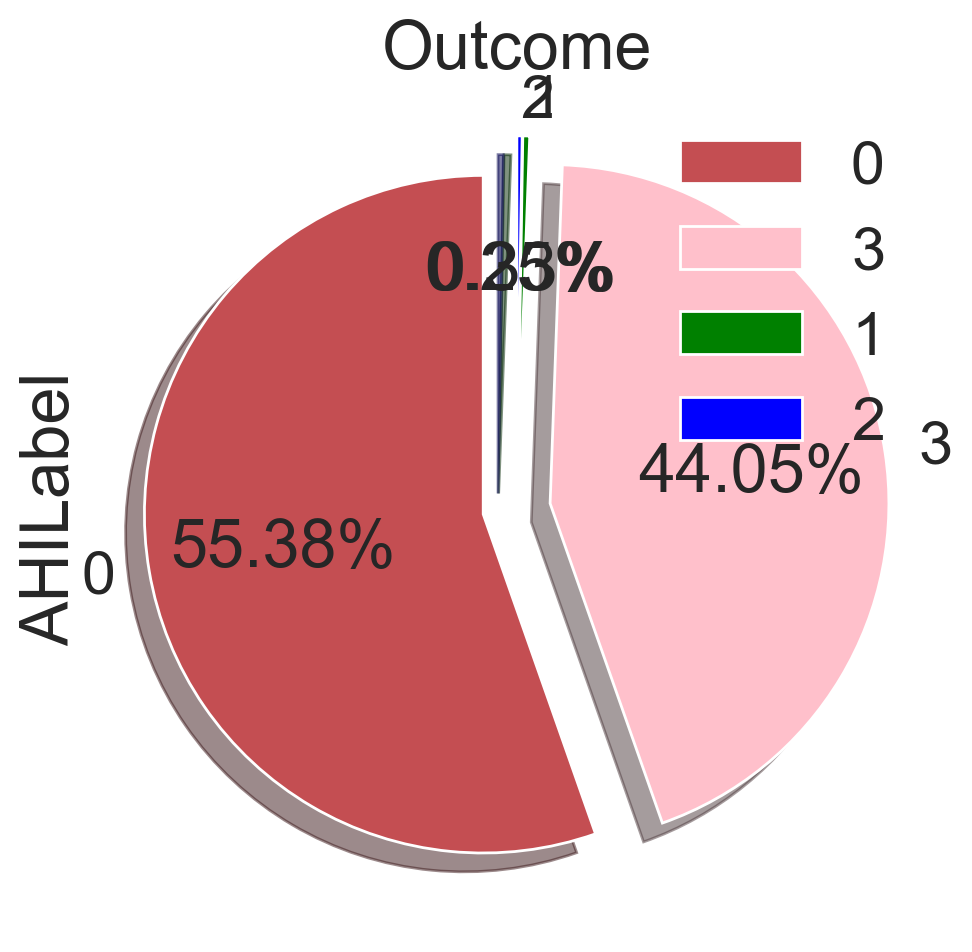

In [171]:
print(df1.AHILabel.value_counts())
color=['r',"pink","green","blue"]
df1['AHILabel'].value_counts().plot.pie(colors=color,startangle=90, shadow=True,explode=(0.1, 0.1, 0.1, 0.1), autopct='%1.2f%%').set_title('Outcome')
plt.legend()
plt.show

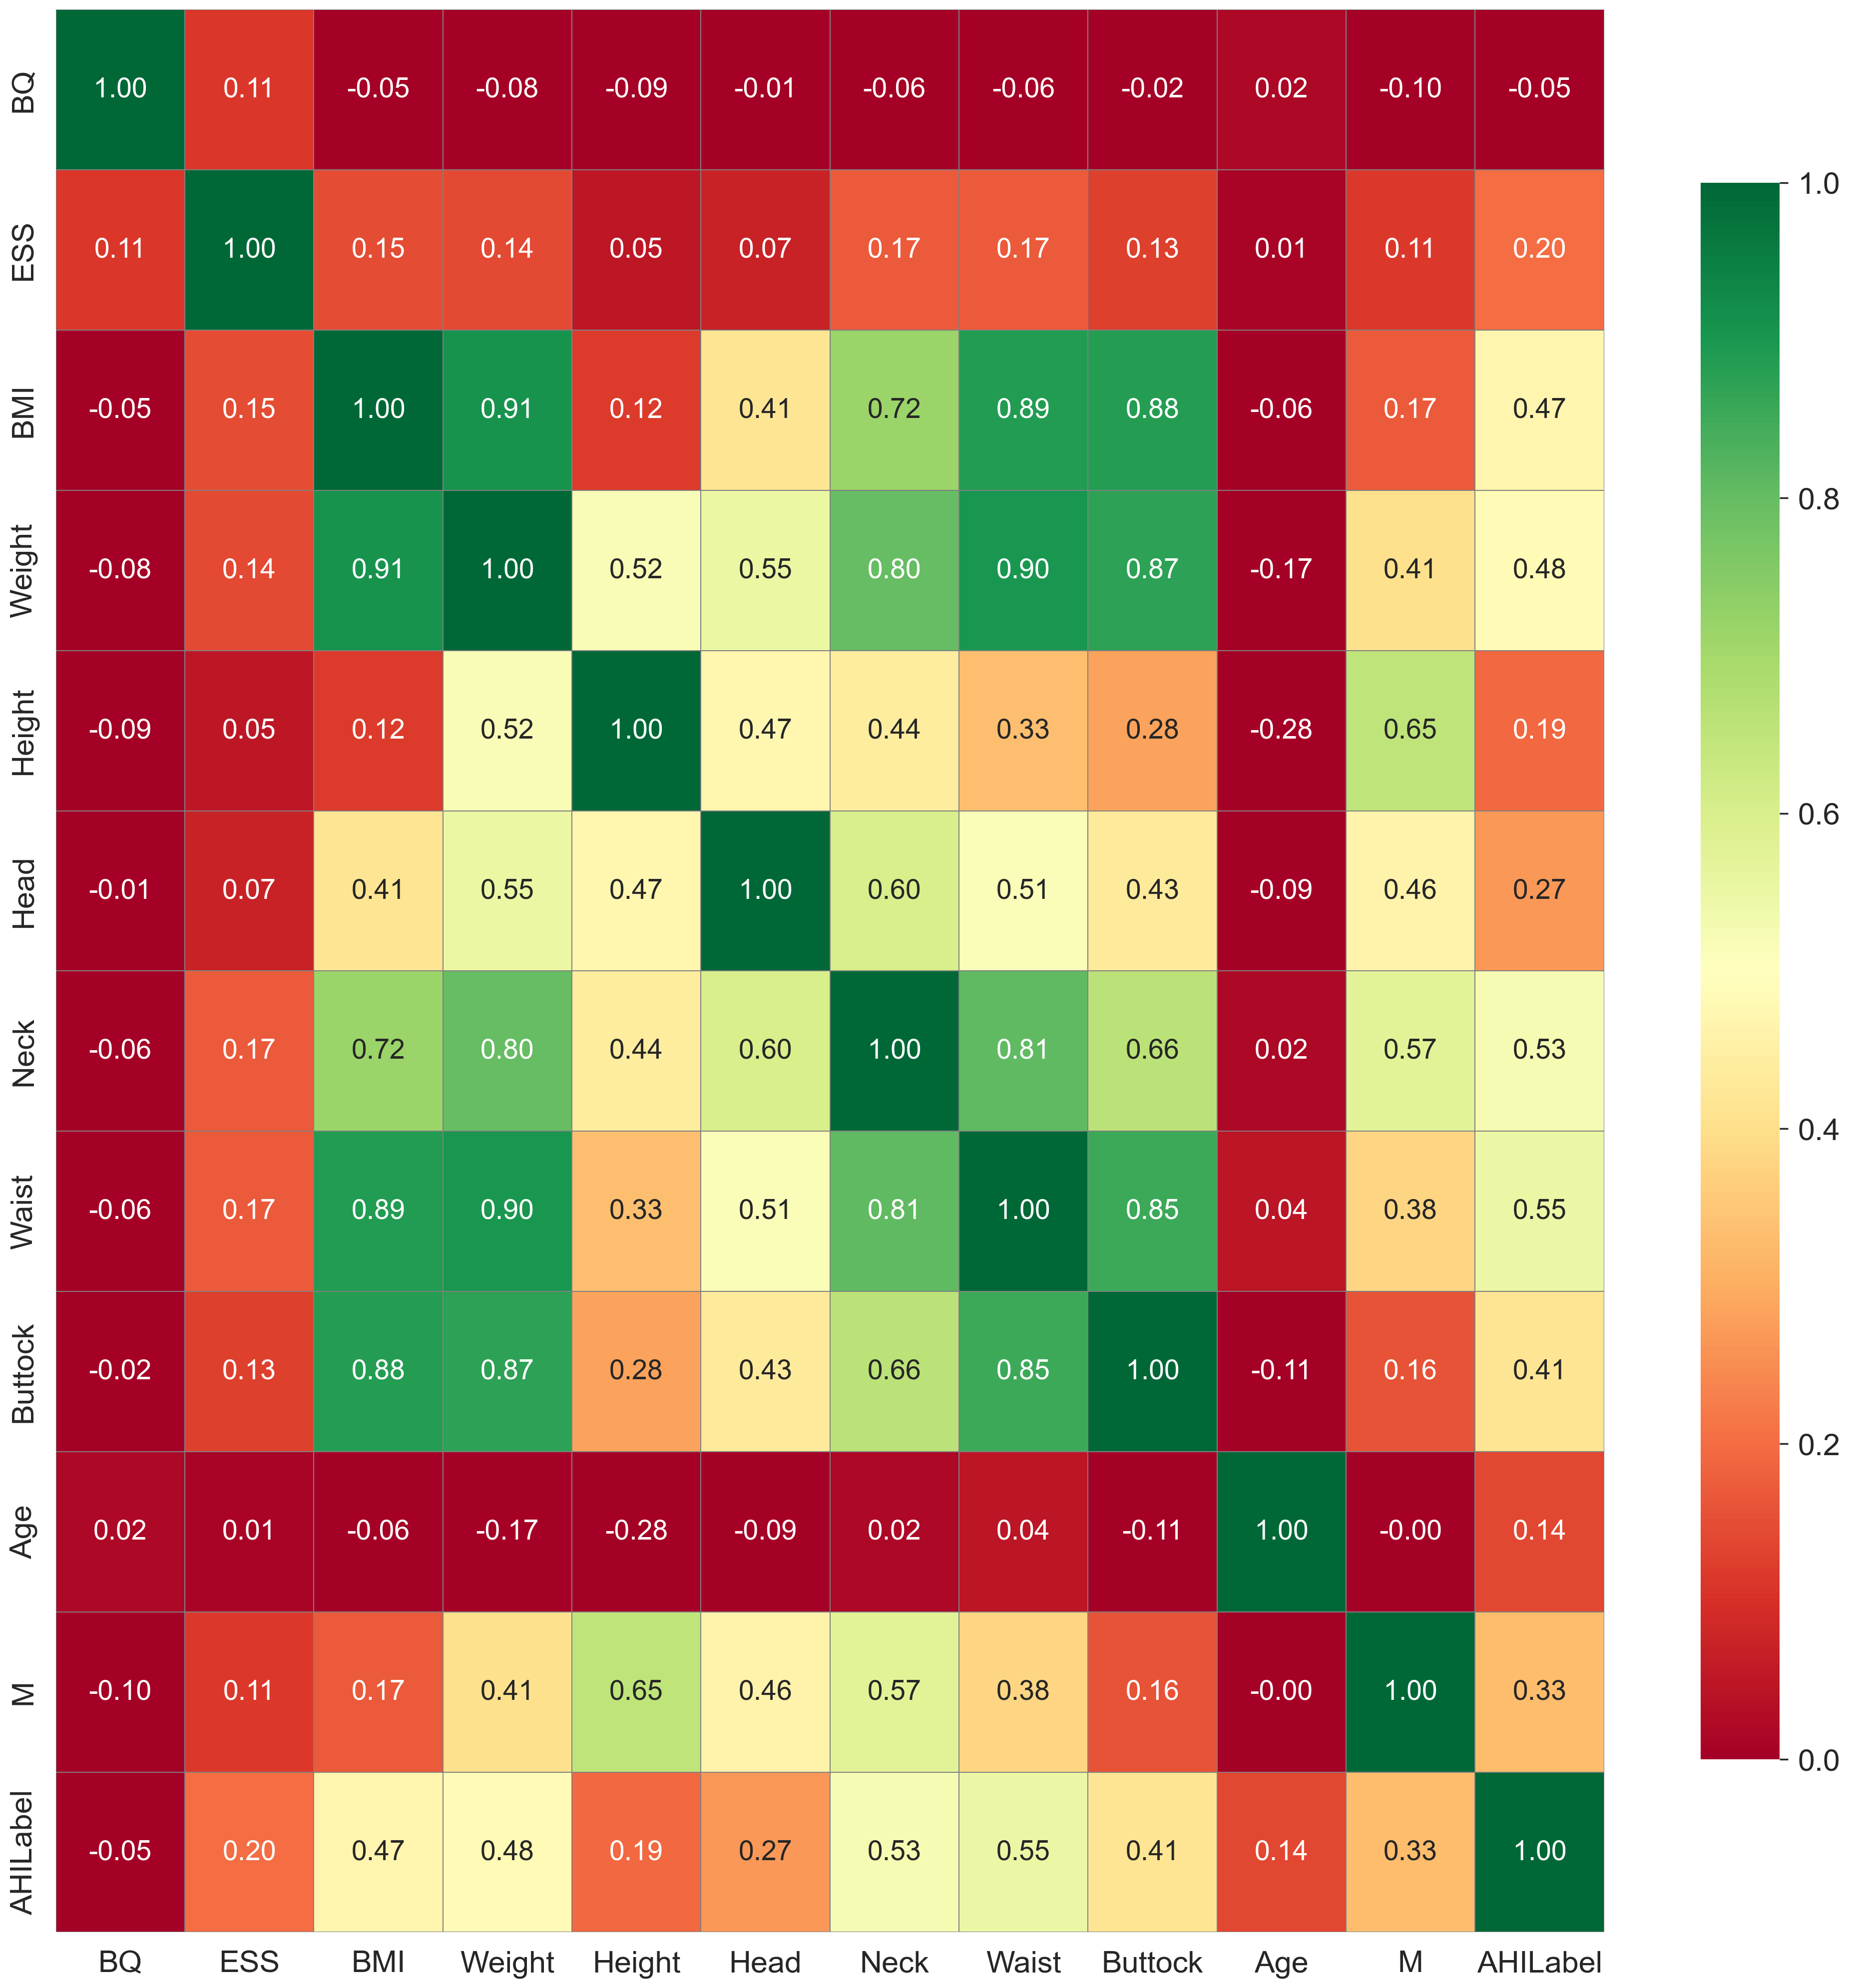

In [172]:
df = df1
X = df.iloc[:,0:11]  
y = df.iloc[:,-1]   
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,25))
sns.set(font_scale=2)
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn",vmin=0.0, vmax=1.0, 
                  annot_kws={"size": 20},
                  fmt='.2f', cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')

# Train

In [173]:
X = df.drop('AHILabel', axis=1)   
y = df['AHILabel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)



X_train (4166, 11)
y_train (4166,)
X_test (1042, 11)
y_test (1042,)


In [174]:
def evaluate(model, X_test , y_test,modelname):
    y_pred1=model.predict(X_test)
    accuracy     = accuracy_score(y_test, y_pred1)
    classification=classification_report(y_test,y_pred1)
    confusion    = confusion_matrix(y_test, y_pred1)
    df_model1 = pd.DataFrame({  'model'        : [modelname],
                              'accuracy'     : [accuracy],
                              'classification':[classification],
                              'timetaken'    : [time2],
                              'confusionmatrix' : [confusion]
                             }) 
    return df_model1

Random Forest

In [175]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))
print(accuracy_score(y_test, y_pred1))

[[502   0   0  81]
 [  1   0   0   0]
 [  1   0   0   0]
 [118   0   0 339]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       583
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.81      0.74      0.77       457

    accuracy                           0.81      1042
   macro avg       0.40      0.40      0.40      1042
weighted avg       0.81      0.81      0.81      1042

0.8071017274472169


Logistic Regression

In [176]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
y_pred2 = lr.predict(X_test)
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))
print(accuracy_score(y_test, y_pred2))

[[489   0   0  94]
 [  1   0   0   0]
 [  1   0   0   0]
 [124   0   0 333]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       583
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.78      0.73      0.75       457

    accuracy                           0.79      1042
   macro avg       0.39      0.39      0.39      1042
weighted avg       0.79      0.79      0.79      1042

0.7888675623800384


KNN

In [177]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred3 = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))
print(accuracy_score(y_test, y_pred3))

[[457   0   0 126]
 [  1   0   0   0]
 [  1   0   0   0]
 [121   0   0 336]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       583
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.73      0.74      0.73       457

    accuracy                           0.76      1042
   macro avg       0.38      0.38      0.38      1042
weighted avg       0.76      0.76      0.76      1042

0.7610364683301344


In [231]:
classes = ["Normal", "Mild","Moderate","Severe"]


In [232]:
classifiers=[
RandomForestClassifier(random_state=0),
LogisticRegression(random_state=0),
KNeighborsClassifier()]

In [233]:
# Classification report
def CR_viz():
    def Class_report(model,classes):
        visualizer = ClassificationReport(model, classes=classes, support=True)
        visualizer.fit(X_train, y_train)  
        visualizer.score(X_test, y_test)
        return visualizer.poof()
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        Class_report(name,classes)
        

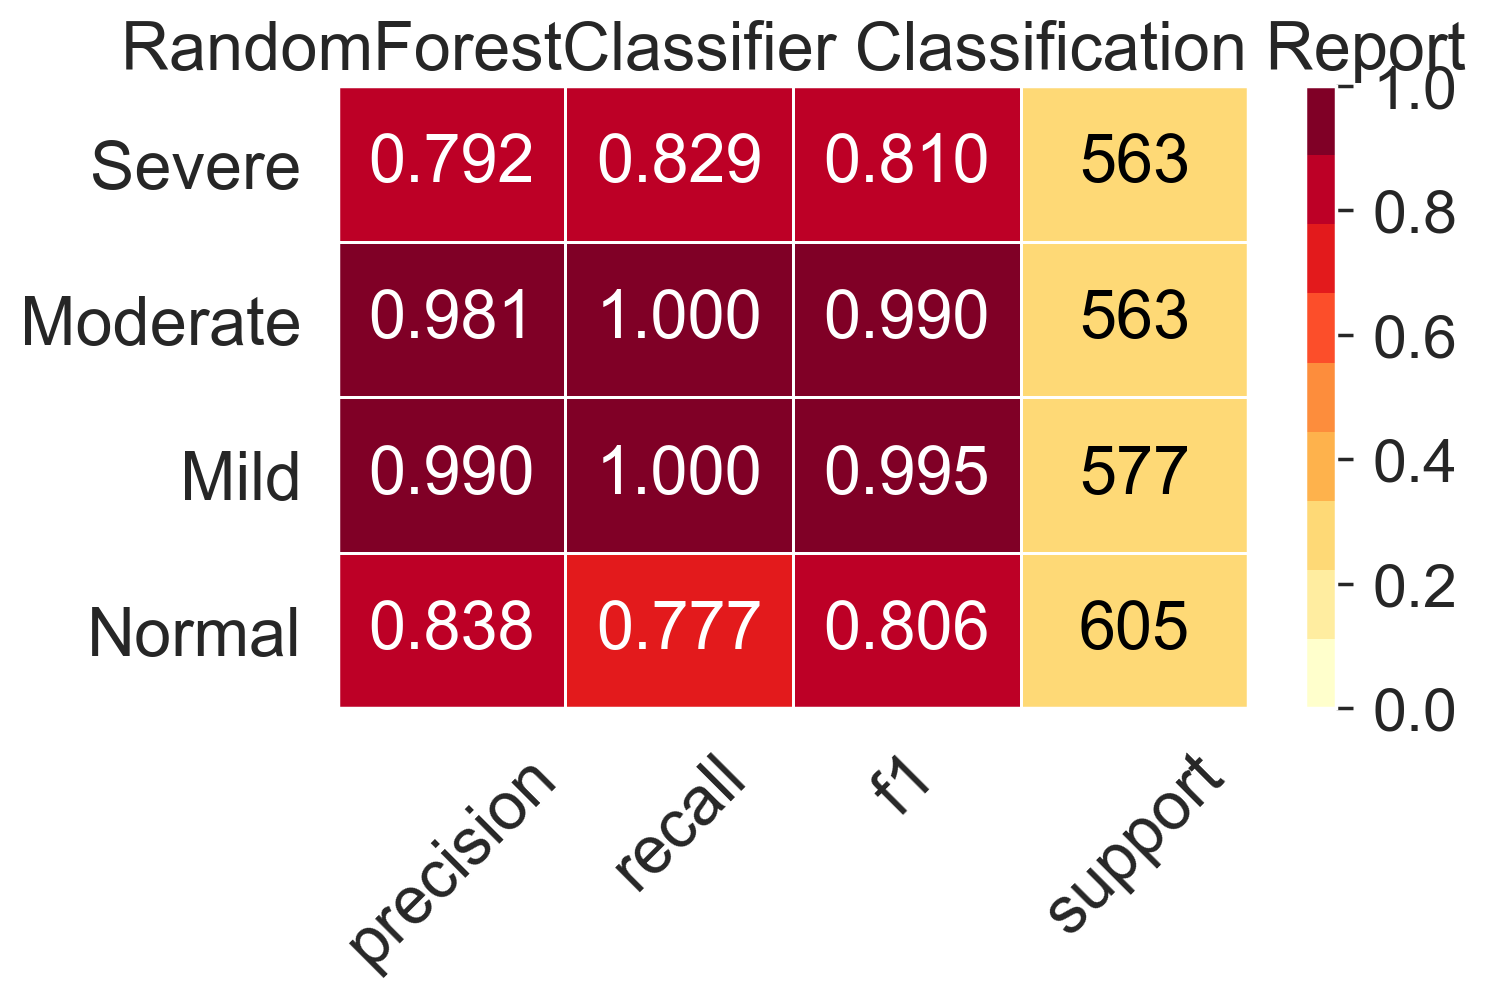

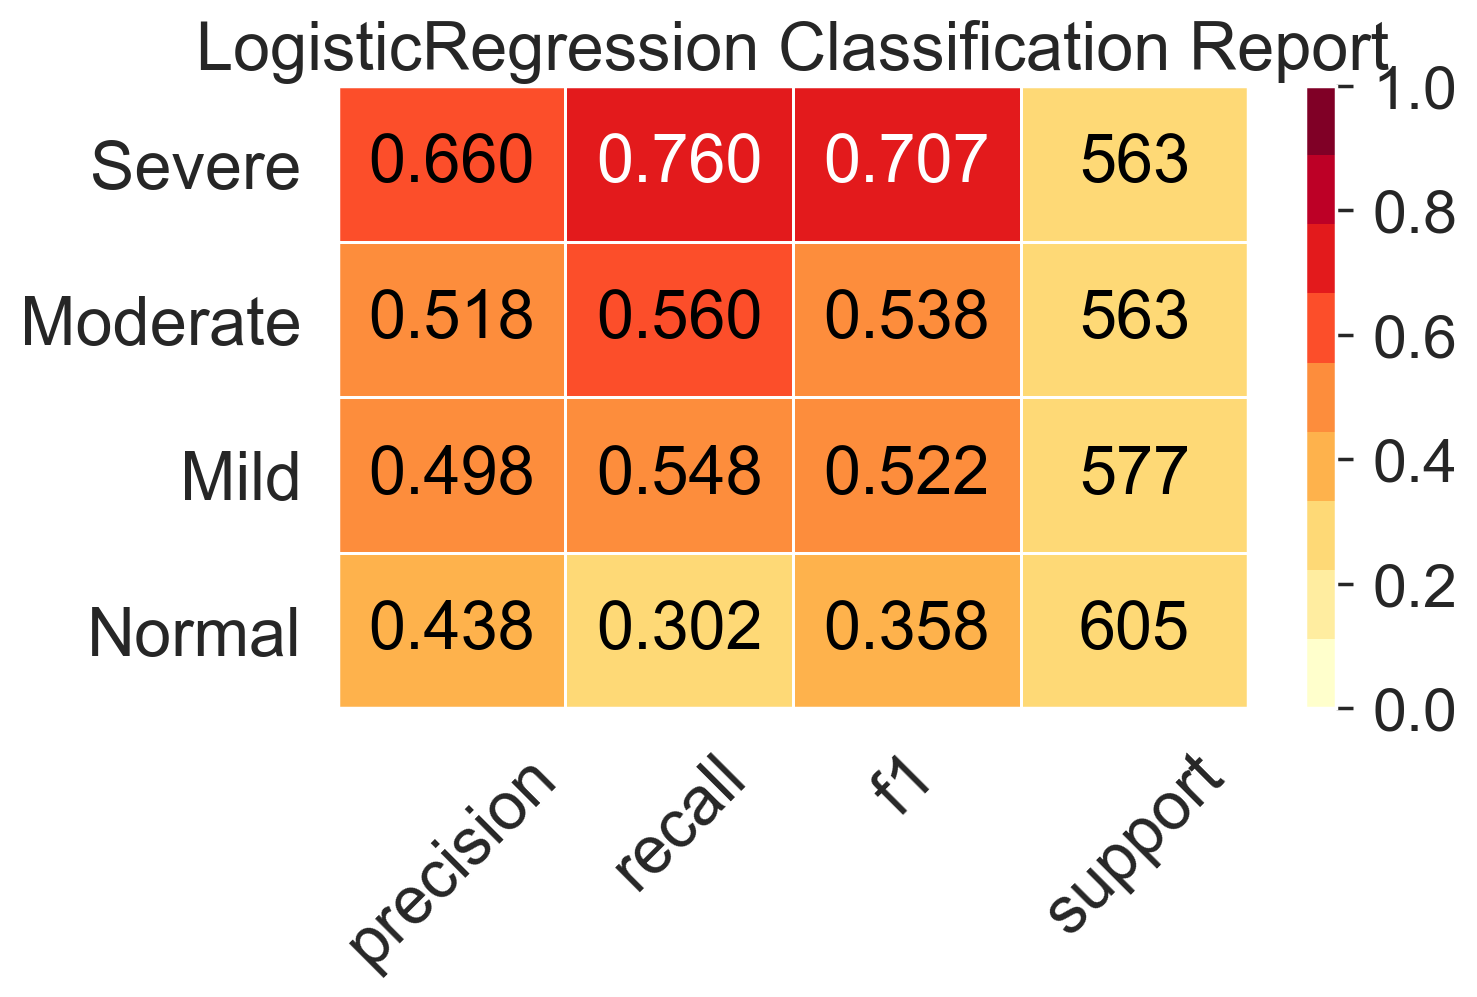

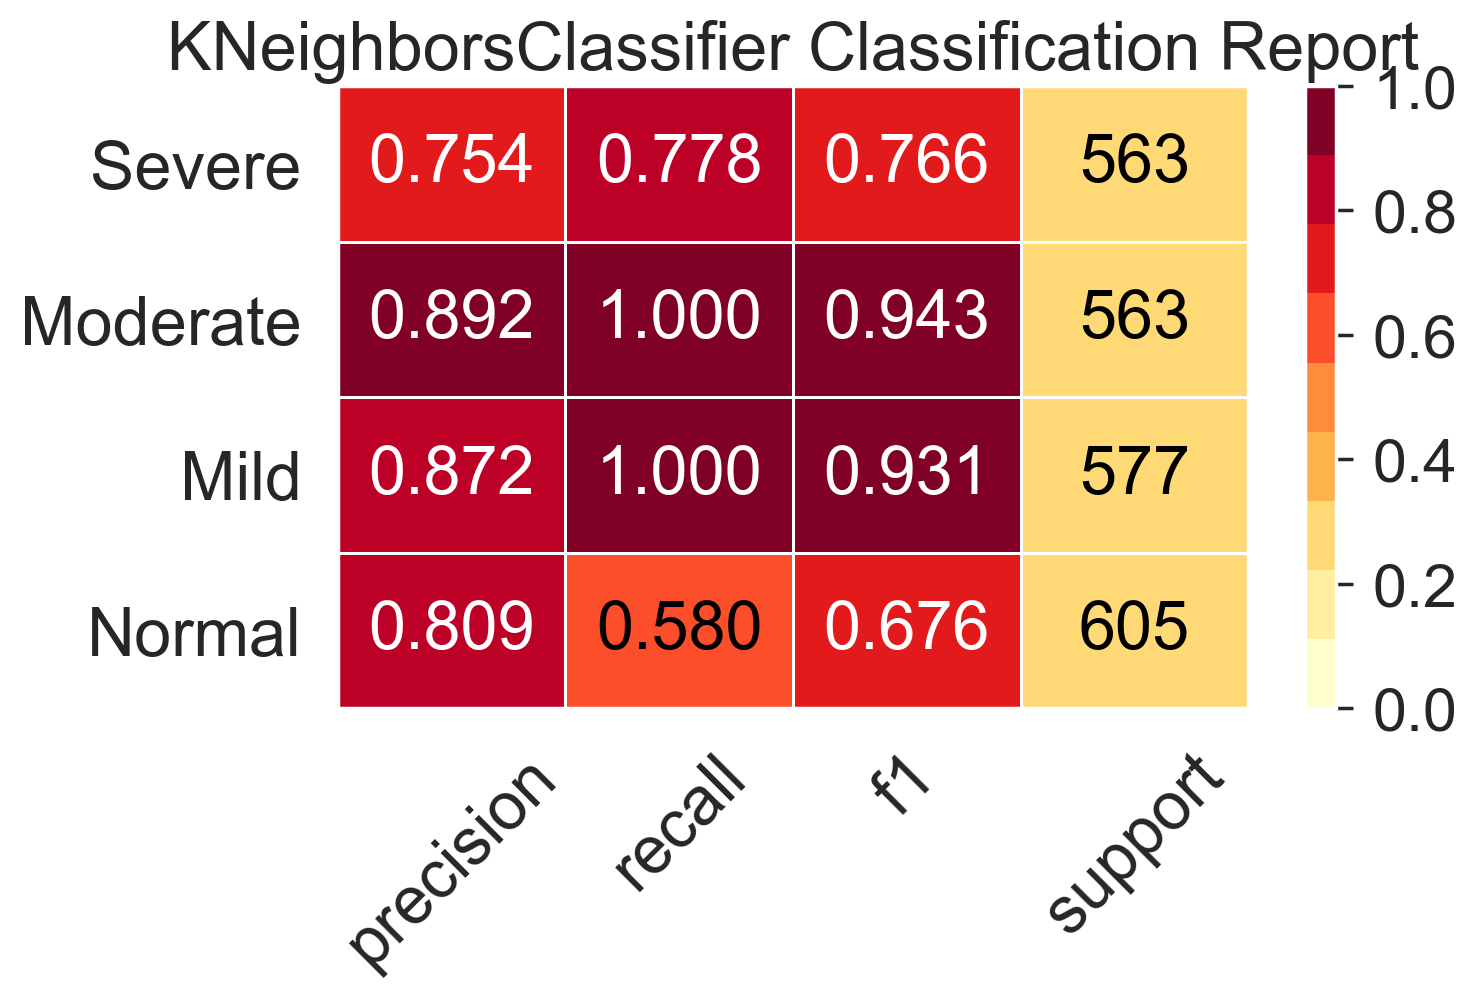

In [234]:
visualization =[CR_viz()]

# Oversampling using smote

In [182]:
df2=pd.read_excel('./datasets/final_sleep_data.xlsx')  
df2

,Unnamed: 0,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,AHILabel
0,0,0,14,29.065927,88.0,174.0,57.500000,39.0,95.5,106.5,20.0,1,0
1,1,0,8,26.989619,78.0,170.0,57.000000,36.5,90.0,100.0,20.0,1,0
2,2,0,16,23.939481,75.0,177.0,59.000000,39.0,88.0,104.0,20.0,1,0
3,3,0,15,22.129740,67.0,174.0,57.000000,35.0,74.0,94.0,20.0,1,0
4,4,0,15,22.129740,67.0,174.0,57.000000,35.0,74.0,94.0,20.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5203,5240,1,6,24.005487,63.0,162.0,57.000000,33.0,99.0,101.5,77.0,0,3
5204,5241,0,13,29.964328,63.0,145.0,53.000000,35.8,102.0,112.0,77.0,0,3
5205,5242,0,13,29.964328,63.0,145.0,53.000000,35.8,102.0,112.0,77.0,0,3
5206,5243,0,0,24.654832,60.0,156.0,54.500000,35.0,83.5,99.0,79.0,0,3


In [183]:
df2 = df2.loc[:, ~df2.columns.str.contains('^Unnamed')]
df2

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,AHILabel
0,0,14,29.065927,88.0,174.0,57.500000,39.0,95.5,106.5,20.0,1,0
1,0,8,26.989619,78.0,170.0,57.000000,36.5,90.0,100.0,20.0,1,0
2,0,16,23.939481,75.0,177.0,59.000000,39.0,88.0,104.0,20.0,1,0
3,0,15,22.129740,67.0,174.0,57.000000,35.0,74.0,94.0,20.0,1,0
4,0,15,22.129740,67.0,174.0,57.000000,35.0,74.0,94.0,20.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5203,1,6,24.005487,63.0,162.0,57.000000,33.0,99.0,101.5,77.0,0,3
5204,0,13,29.964328,63.0,145.0,53.000000,35.8,102.0,112.0,77.0,0,3
5205,0,13,29.964328,63.0,145.0,53.000000,35.8,102.0,112.0,77.0,0,3
5206,0,0,24.654832,60.0,156.0,54.500000,35.0,83.5,99.0,79.0,0,3


In [184]:
p=df2.drop('AHILabel',axis=1)
q=df2['AHILabel']

In [185]:
oversample = SMOTE()
p, q = oversample.fit_resample(p, q)

Text(0, 0.5, 'Frequency')

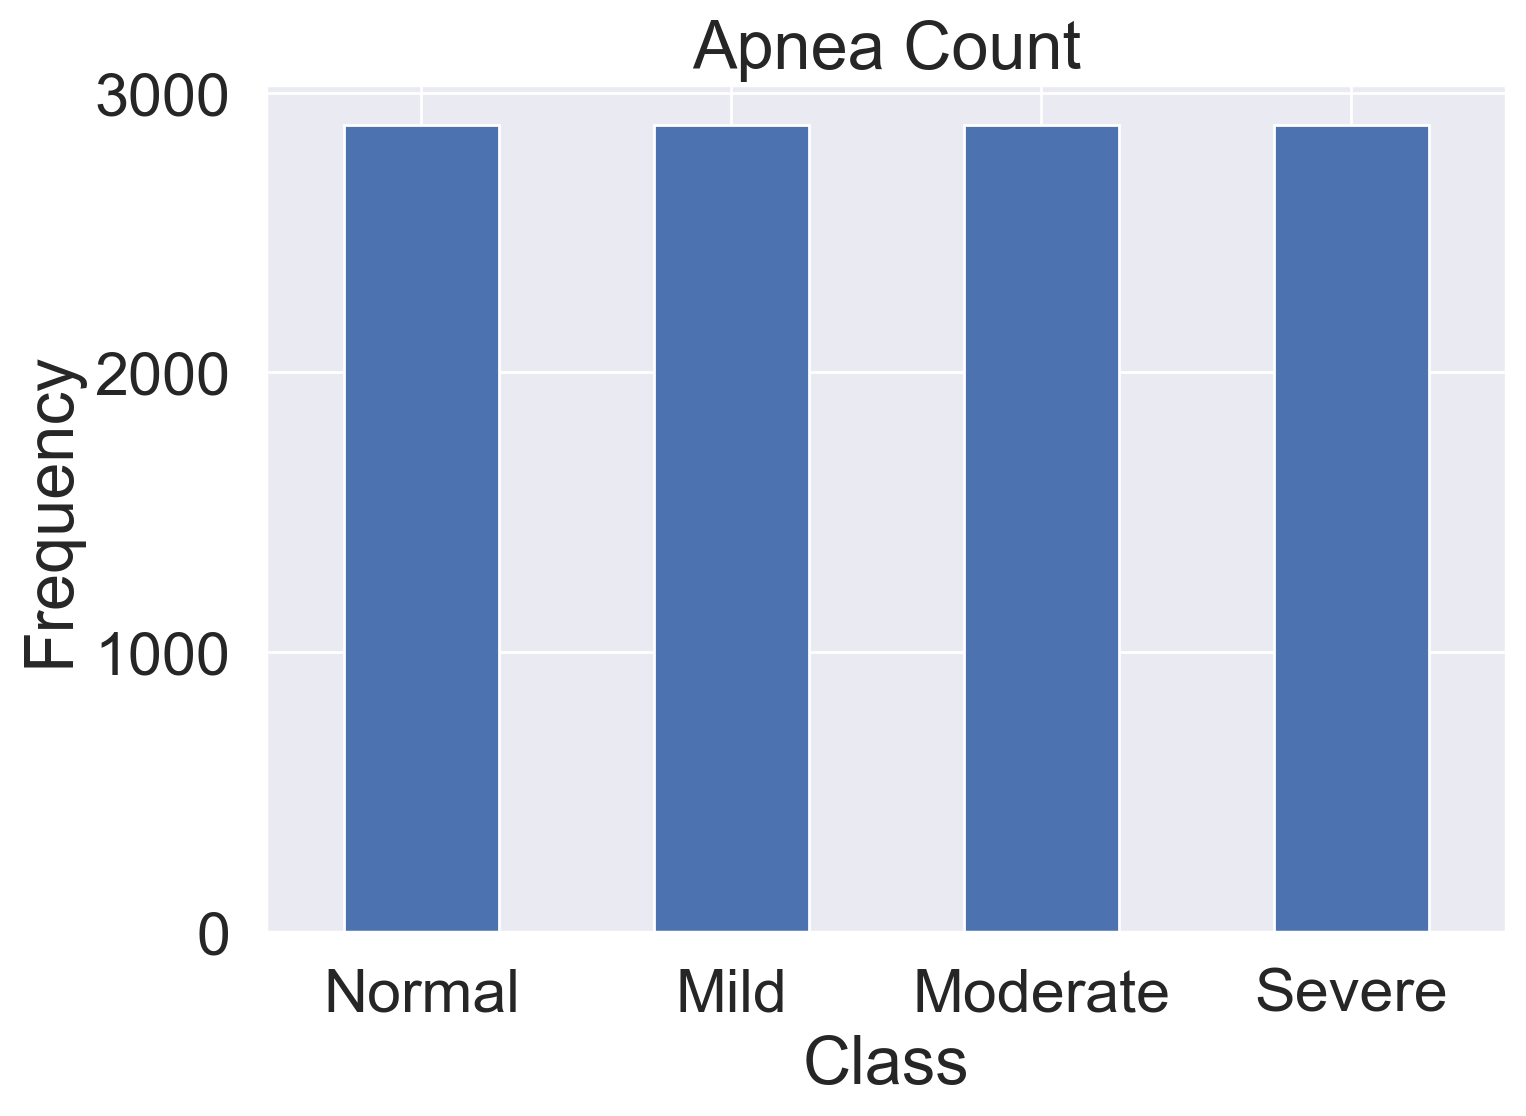

In [186]:
LABELS = ["Normal", "Mild","Moderate","Severe"]

count_classes = pd.value_counts(q, sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Apnea Count")

plt.xticks(range(4), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

0    2884
3    2884
2    2884
1    2884
Name: AHILabel, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

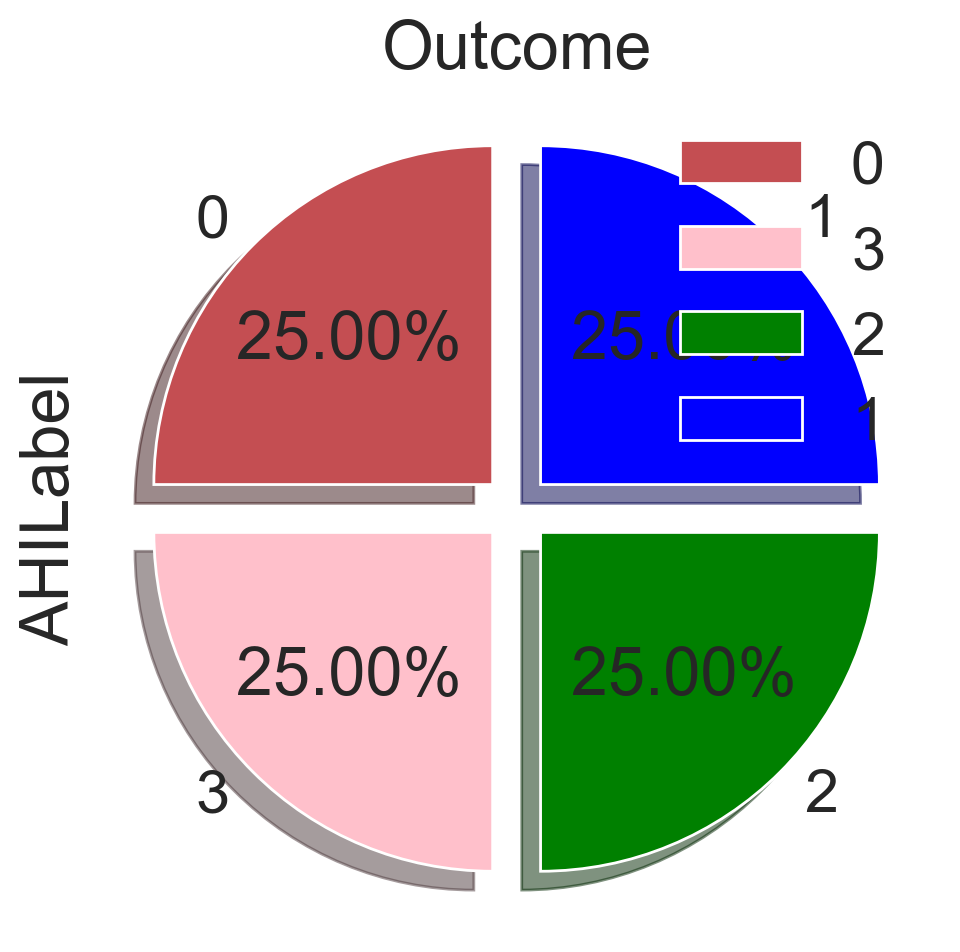

In [187]:
print(q.value_counts())
color=['r',"pink","green","blue"]
q.value_counts().plot.pie(colors=color,startangle=90, shadow=True,explode=(0.1, 0.1, 0.1, 0.1), autopct='%1.2f%%').set_title('Outcome')
plt.legend()
plt.show

In [188]:
p

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M
0,0,14,29.065927,88.000000,174.000000,57.500000,39.000000,95.500000,106.500000,20.000000,1
1,0,8,26.989619,78.000000,170.000000,57.000000,36.500000,90.000000,100.000000,20.000000,1
2,0,16,23.939481,75.000000,177.000000,59.000000,39.000000,88.000000,104.000000,20.000000,1
3,0,15,22.129740,67.000000,174.000000,57.000000,35.000000,74.000000,94.000000,20.000000,1
4,0,15,22.129740,67.000000,174.000000,57.000000,35.000000,74.000000,94.000000,20.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
11531,0,3,27.348300,82.467657,173.645105,56.354895,41.878933,101.088724,101.911276,50.467657,1
11532,0,14,22.045961,64.464595,171.000000,57.858378,36.000000,80.141622,95.645946,47.858378,1
11533,0,19,26.284316,65.374513,157.719115,55.187256,39.812744,91.000000,94.406372,65.374513,1
11534,0,20,36.198003,104.930322,170.267419,56.267419,45.197742,116.000000,115.465161,39.267419,1


In [189]:
q

0        0
1        0
2        0
3        0
4        0
        ..
11531    3
11532    3
11533    3
11534    3
11535    3
Name: AHILabel, Length: 11536, dtype: int64

In [190]:
df2 = pd.concat([p,q],axis='columns')
df2=df2.round({'BQ' : 0,'ESS' : 0,'BMI' : 5,'Weight' : 0,'Height' : 0,'Head' : 1,'Neck' : 0,'Waist' : 0,'Buttock' : 0,'Age' : 0,'M' : 0,'status' : 0,})
df2

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,AHILabel
0,0,14,29.06593,88.0,174.0,57.5,39.0,96.0,106.0,20.0,1,0
1,0,8,26.98962,78.0,170.0,57.0,36.0,90.0,100.0,20.0,1,0
2,0,16,23.93948,75.0,177.0,59.0,39.0,88.0,104.0,20.0,1,0
3,0,15,22.12974,67.0,174.0,57.0,35.0,74.0,94.0,20.0,1,0
4,0,15,22.12974,67.0,174.0,57.0,35.0,74.0,94.0,20.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11531,0,3,27.34830,82.0,174.0,56.4,42.0,101.0,102.0,50.0,1,3
11532,0,14,22.04596,64.0,171.0,57.9,36.0,80.0,96.0,48.0,1,3
11533,0,19,26.28432,65.0,158.0,55.2,40.0,91.0,94.0,65.0,1,3
11534,0,20,36.19800,105.0,170.0,56.3,45.0,116.0,115.0,39.0,1,3


In [191]:
p=df2.drop('AHILabel',axis=1)
q=df2['AHILabel']

In [192]:
X_train, X_test, y_train, y_test = train_test_split(p, q, test_size=.2)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (9228, 11)
y_train (9228,)
X_test (2308, 11)
y_test (2308,)


In [193]:
def evaluate(model, X_test , y_test,modelname):
    y_pred1=model.predict(X_test)
    accuracy     = accuracy_score(y_test, y_pred1)
    classification=classification_report(y_test, y_pred1)
    confusion    = confusion_matrix(y_test, y_pred1)
    df_model2 = pd.DataFrame({  'model'        : [modelname],
                              'accuracy'     : [accuracy],
                              'classification':[classification],
                              'timetaken'    : [time2],
                              'confusionmatrix' : [confusion]
                             }) 
    return df_model2

In [194]:
rf1 = RandomForestClassifier(random_state=0)
rf1.fit(X_train, y_train)
y_pred4 = rf1.predict(X_test)
print(confusion_matrix(y_test, y_pred4))
print(classification_report(y_test, y_pred4))
print(accuracy_score(y_test, y_pred4))

[[456   8   9 103]
 [  0 581   0   0]
 [  0   0 551   0]
 [105   0   2 493]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       576
           1       0.99      1.00      0.99       581
           2       0.98      1.00      0.99       551
           3       0.83      0.82      0.82       600

    accuracy                           0.90      2308
   macro avg       0.90      0.90      0.90      2308
weighted avg       0.90      0.90      0.90      2308

0.9016464471403813


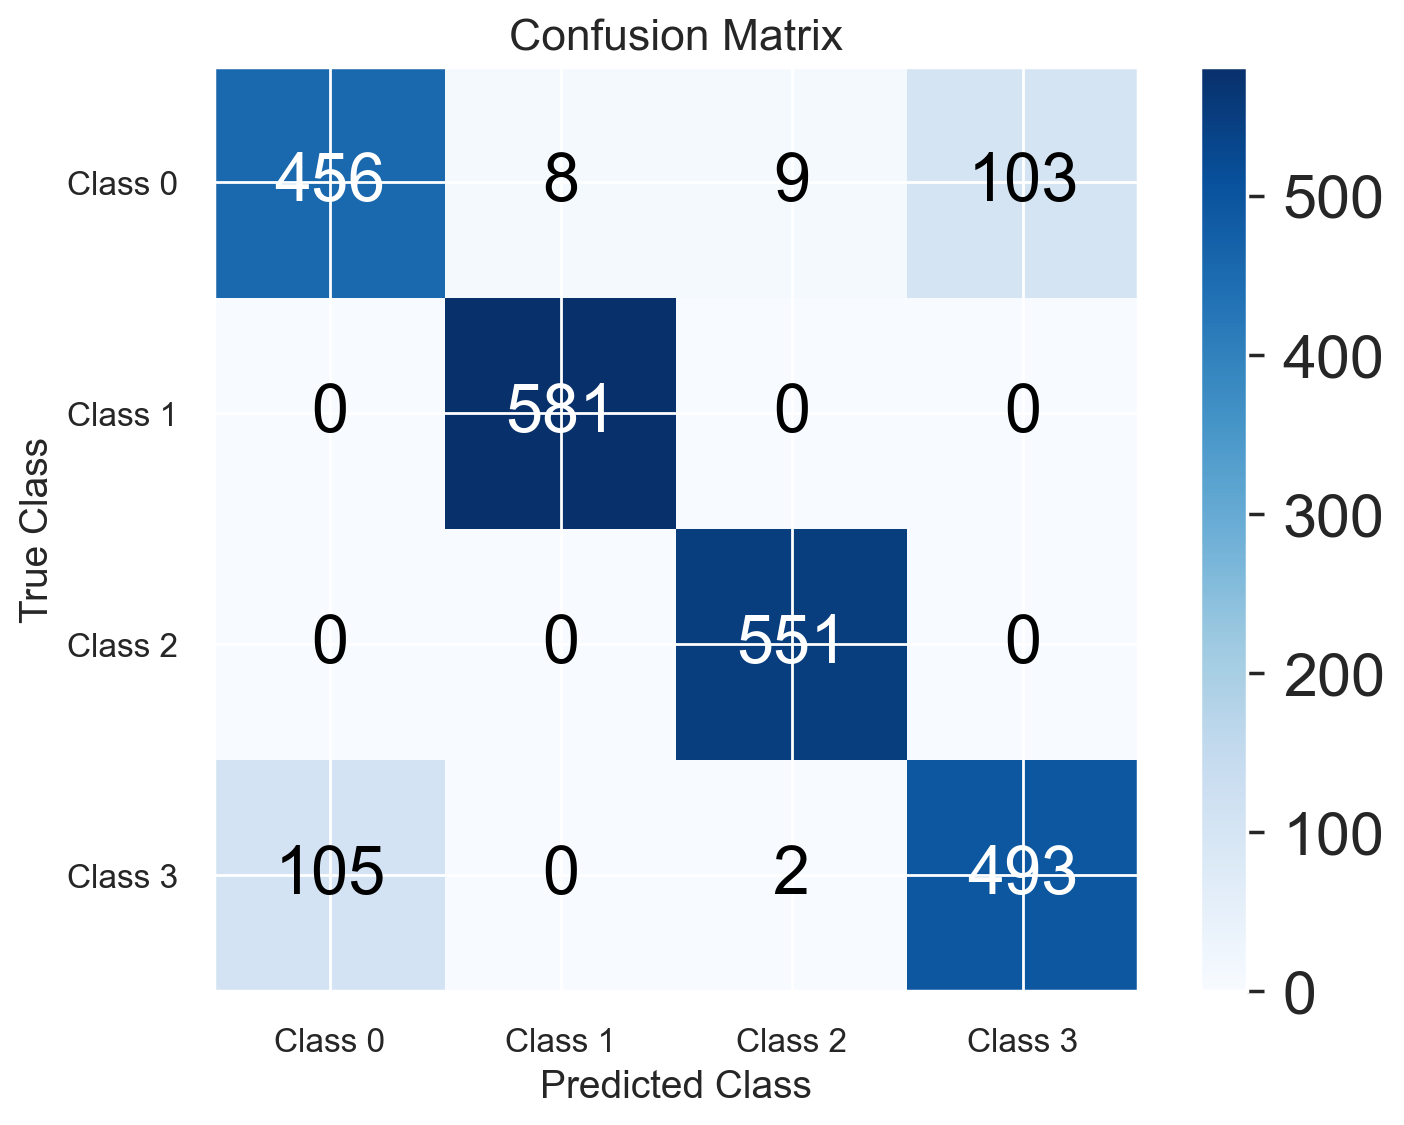

In [195]:
# Define class labels
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

# Compute confusion matrix
cm1 = confusion_matrix(y_test, y_pred4)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm1, cmap='Blues')

# Add color bar
cbar = ax.figure.colorbar(im, ax=ax)

# Set tick labels and axis labels
ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names, fontsize=12)
ax.set_yticklabels(class_names, fontsize=12)
ax.set_xlabel('Predicted Class', fontsize=14)
ax.set_ylabel('True Class', fontsize=14)

# Add values to the plot
thresh = cm1.max() / 2.
for i in range(cm1.shape[0]):
    for j in range(cm1.shape[1]):
        ax.text(j, i, format(cm1[i, j], '.0f'),
                ha="center", va="center",
                color="white" if cm1[i, j] > thresh else "black")

# Set title
ax.set_title('Confusion Matrix', fontsize=16)

# Show plot
plt.show()


In [196]:
lr1 = LogisticRegression(random_state=0)
lr1.fit(X_train, y_train)
y_pred5 = lr1.predict(X_test)
print(confusion_matrix(y_test, y_pred5))
print(classification_report(y_test, y_pred5))
print(accuracy_score(y_test, y_pred5))

[[137 166 145 128]
 [119 318 111  33]
 [ 39 121 349  42]
 [ 34  44  85 437]]
              precision    recall  f1-score   support

           0       0.42      0.24      0.30       576
           1       0.49      0.55      0.52       581
           2       0.51      0.63      0.56       551
           3       0.68      0.73      0.70       600

    accuracy                           0.54      2308
   macro avg       0.52      0.54      0.52      2308
weighted avg       0.53      0.54      0.52      2308

0.5376949740034662


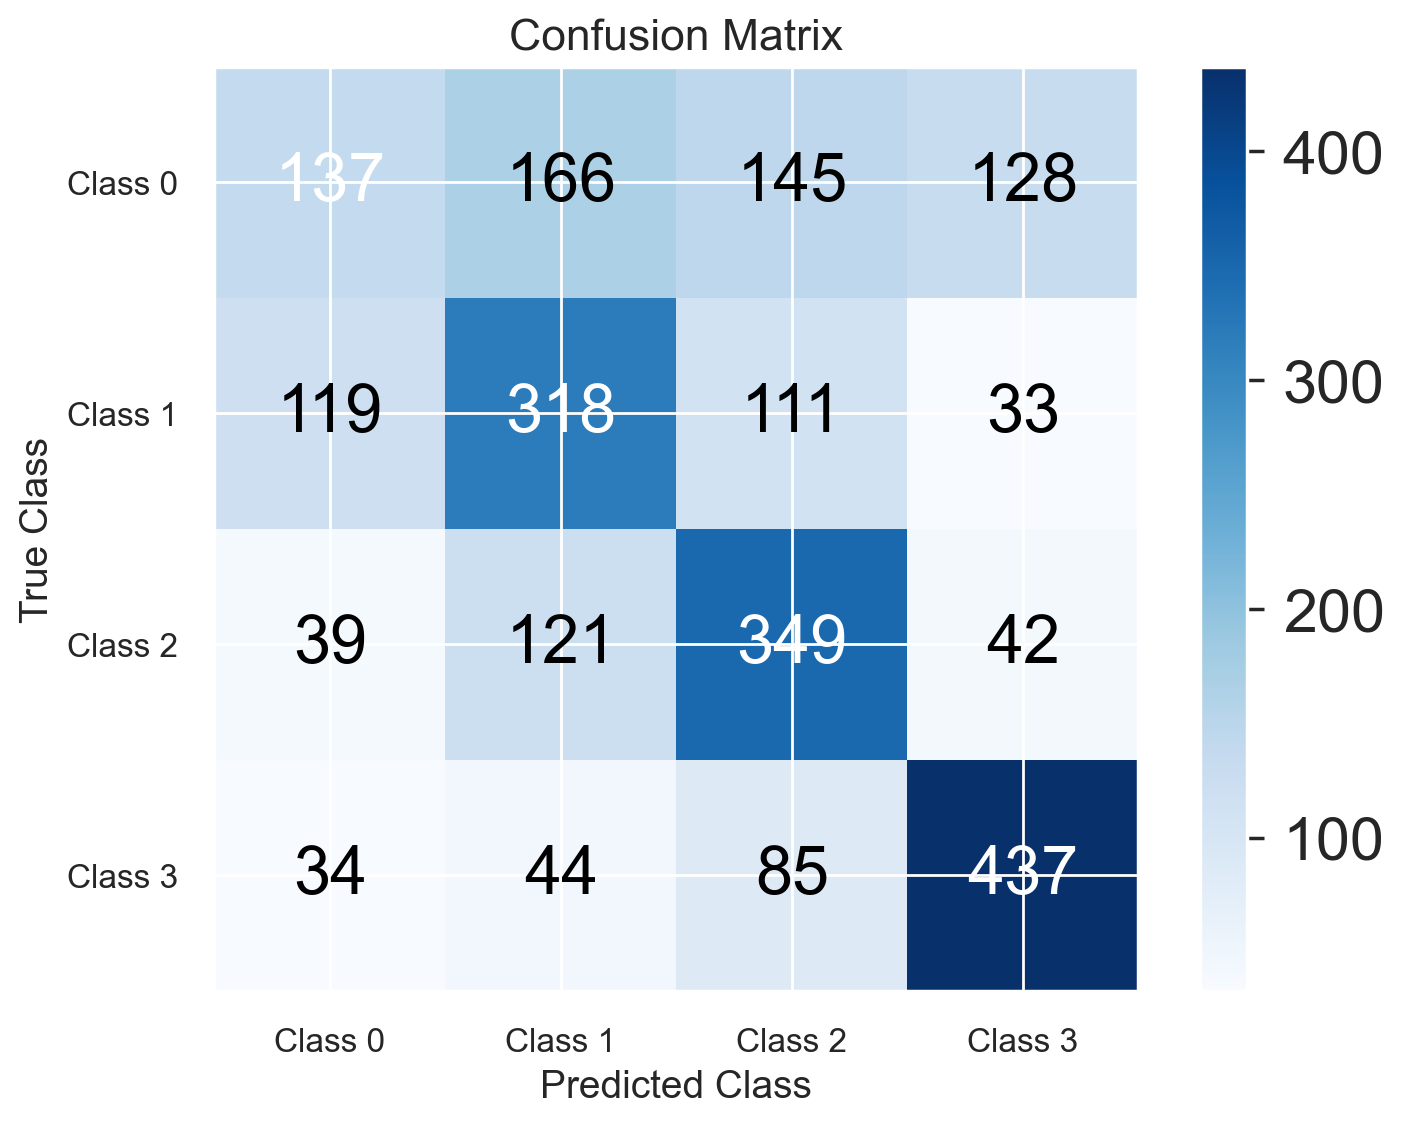

In [197]:
# Define class labels
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

# Compute confusion matrix
cm2 = confusion_matrix(y_test, y_pred5)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm2, cmap='Blues')

# Add color bar
cbar = ax.figure.colorbar(im, ax=ax)

# Set tick labels and axis labels
ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names, fontsize=12)
ax.set_yticklabels(class_names, fontsize=12)
ax.set_xlabel('Predicted Class', fontsize=14)
ax.set_ylabel('True Class', fontsize=14)

# Add values to the plot
thresh = cm2.max() / 2.
for i in range(cm2.shape[0]):
    for j in range(cm2.shape[1]):
        ax.text(j, i, format(cm2[i, j], '.0f'),
                ha="center", va="center",
                color="white" if cm1[i, j] > thresh else "black")

# Set title
ax.set_title('Confusion Matrix', fontsize=16)

# Show plot
plt.show()


In [198]:
knn1 = KNeighborsClassifier()
knn1.fit(X_train, y_train)
y_pred6 = knn1.predict(X_test)
print(confusion_matrix(y_test, y_pred6))
print(classification_report(y_test, y_pred6))
print(accuracy_score(y_test, y_pred6))

[[331  68  48 129]
 [  0 581   0   0]
 [  0   0 551   0]
 [ 97  22  33 448]]
              precision    recall  f1-score   support

           0       0.77      0.57      0.66       576
           1       0.87      1.00      0.93       581
           2       0.87      1.00      0.93       551
           3       0.78      0.75      0.76       600

    accuracy                           0.83      2308
   macro avg       0.82      0.83      0.82      2308
weighted avg       0.82      0.83      0.82      2308

0.8279896013864818


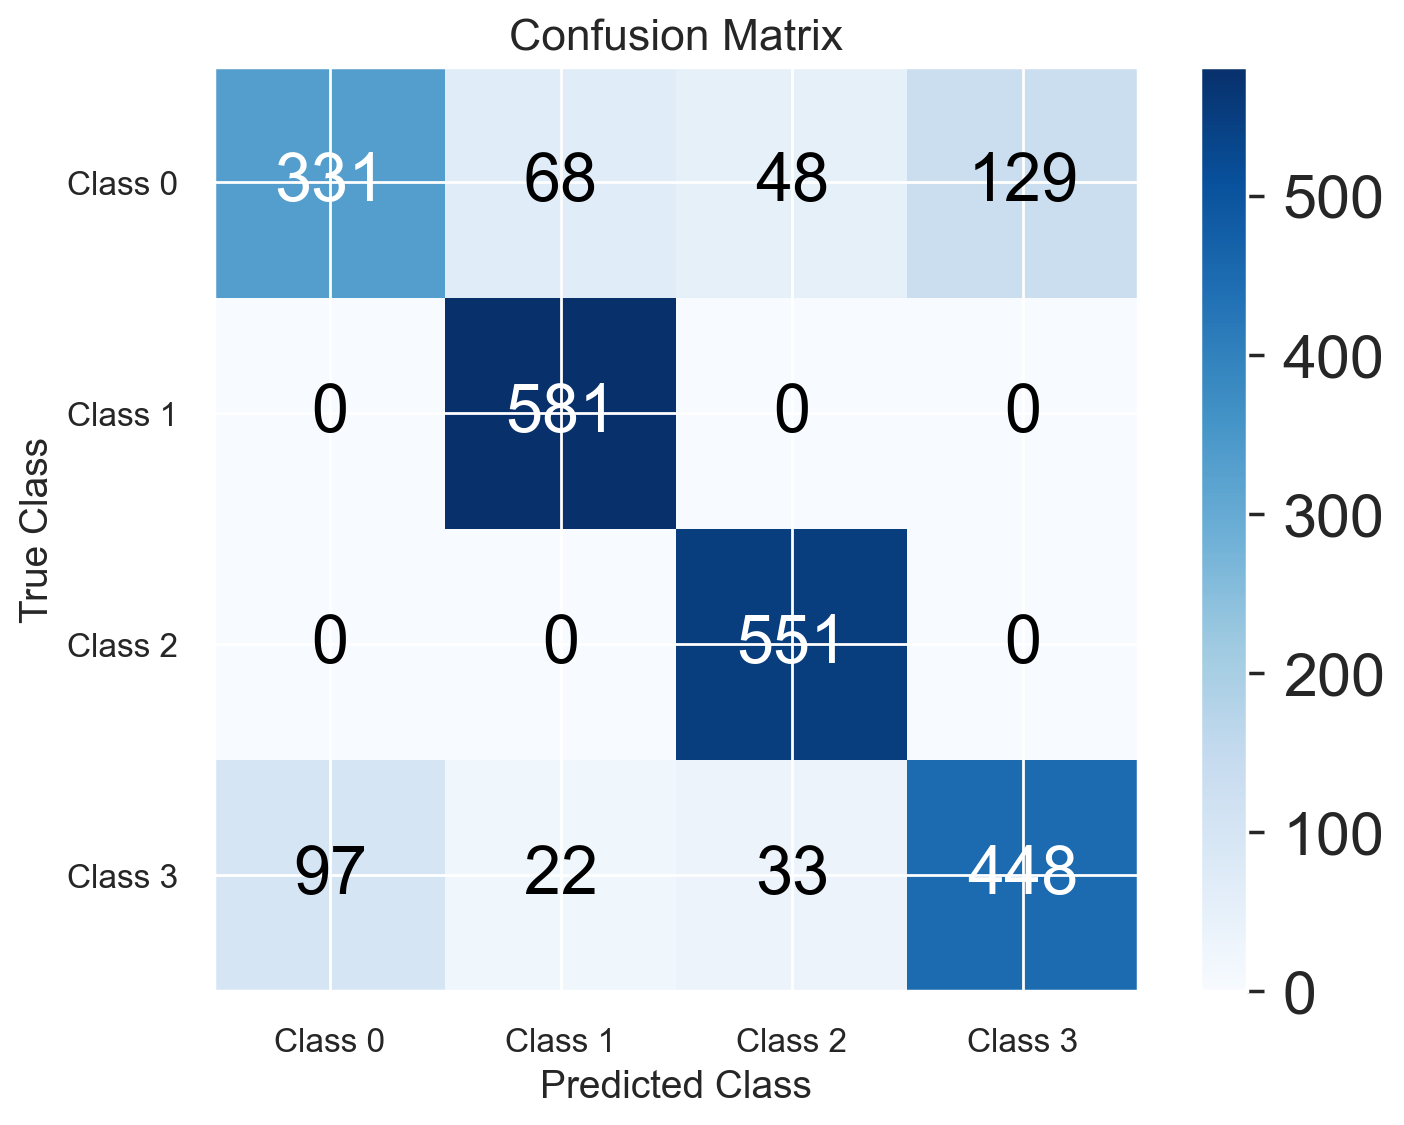

In [199]:
# Define class labels
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

# Compute confusion matrix
cm3 = confusion_matrix(y_test, y_pred6)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm3, cmap='Blues')

# Add color bar
cbar = ax.figure.colorbar(im, ax=ax)

# Set tick labels and axis labels
ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names, fontsize=12)
ax.set_yticklabels(class_names, fontsize=12)
ax.set_xlabel('Predicted Class', fontsize=14)
ax.set_ylabel('True Class', fontsize=14)

# Add values to the plot
thresh = cm3.max() / 2.
for i in range(cm3.shape[0]):
    for j in range(cm3.shape[1]):
        ax.text(j, i, format(cm3[i, j], '.0f'),
                ha="center", va="center",
                color="white" if cm1[i, j] > thresh else "black")

# Set title
ax.set_title('Confusion Matrix', fontsize=16)

# Show plot
plt.show()


In [200]:
%%time
time2=time.time()
base_model = RandomForestClassifier(random_state=0)
base_model.fit(X_train, y_train)
model11 = evaluate(base_model,  X_test,  y_test, 'RandomForest')
model11.timetaken[0] = time.time() - time2
print("Random Forest")
print(base_model.get_params())
(model11)

Random Forest
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
CPU times: total: 3.03 s
Wall time: 3.21 s


,model,accuracy,classification,timetaken,confusionmatrix
0,RandomForest,0.901646,precision recall f1-score ...,3.208845,"[[456, 8, 9, 103], [0, 581, 0, 0], [0, 0, 551,..."


In [201]:
%%time
time2=time.time()
base_model12 = LogisticRegression(random_state=0)
base_model12.fit(X_train, y_train)
model12 = evaluate(base_model12,  X_test,  y_test, 'Logistic Regression')
model12.timetaken[0] = time.time() - time2
print("Logoistic Regression")
print(base_model12.get_params())
(model12)

Logoistic Regression
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
CPU times: total: 688 ms
Wall time: 644 ms


,model,accuracy,classification,timetaken,confusionmatrix
0,Logistic Regression,0.537695,precision recall f1-score ...,0.640979,"[[137, 166, 145, 128], [119, 318, 111, 33], [3..."


In [202]:
%%time
time2=time.time()
base_model13 = KNeighborsClassifier()
base_model13.fit(X_train, y_train)
model13 = evaluate(base_model13,  X_test,  y_test, 'KNN')
model13.timetaken[0] = time.time() - time2
print("KNN")
print(base_model13.get_params())
(model13)

KNN
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
CPU times: total: 312 ms
Wall time: 367 ms


,model,accuracy,classification,timetaken,confusionmatrix
0,KNN,0.82799,precision recall f1-score ...,0.363992,"[[331, 68, 48, 129], [0, 581, 0, 0], [0, 0, 55..."


In [203]:
df_base2= pd.concat([model11,model12,model13],axis = 0).reset_index()
df_base2.drop('index', axis=1, inplace=True)
df_base2

,model,accuracy,classification,timetaken,confusionmatrix
0,RandomForest,0.901646,precision recall f1-score ...,3.208845,"[[456, 8, 9, 103], [0, 581, 0, 0], [0, 0, 551,..."
1,Logistic Regression,0.537695,precision recall f1-score ...,0.640979,"[[137, 166, 145, 128], [119, 318, 111, 33], [3..."
2,KNN,0.827990,precision recall f1-score ...,0.363992,"[[331, 68, 48, 129], [0, 581, 0, 0], [0, 0, 55..."


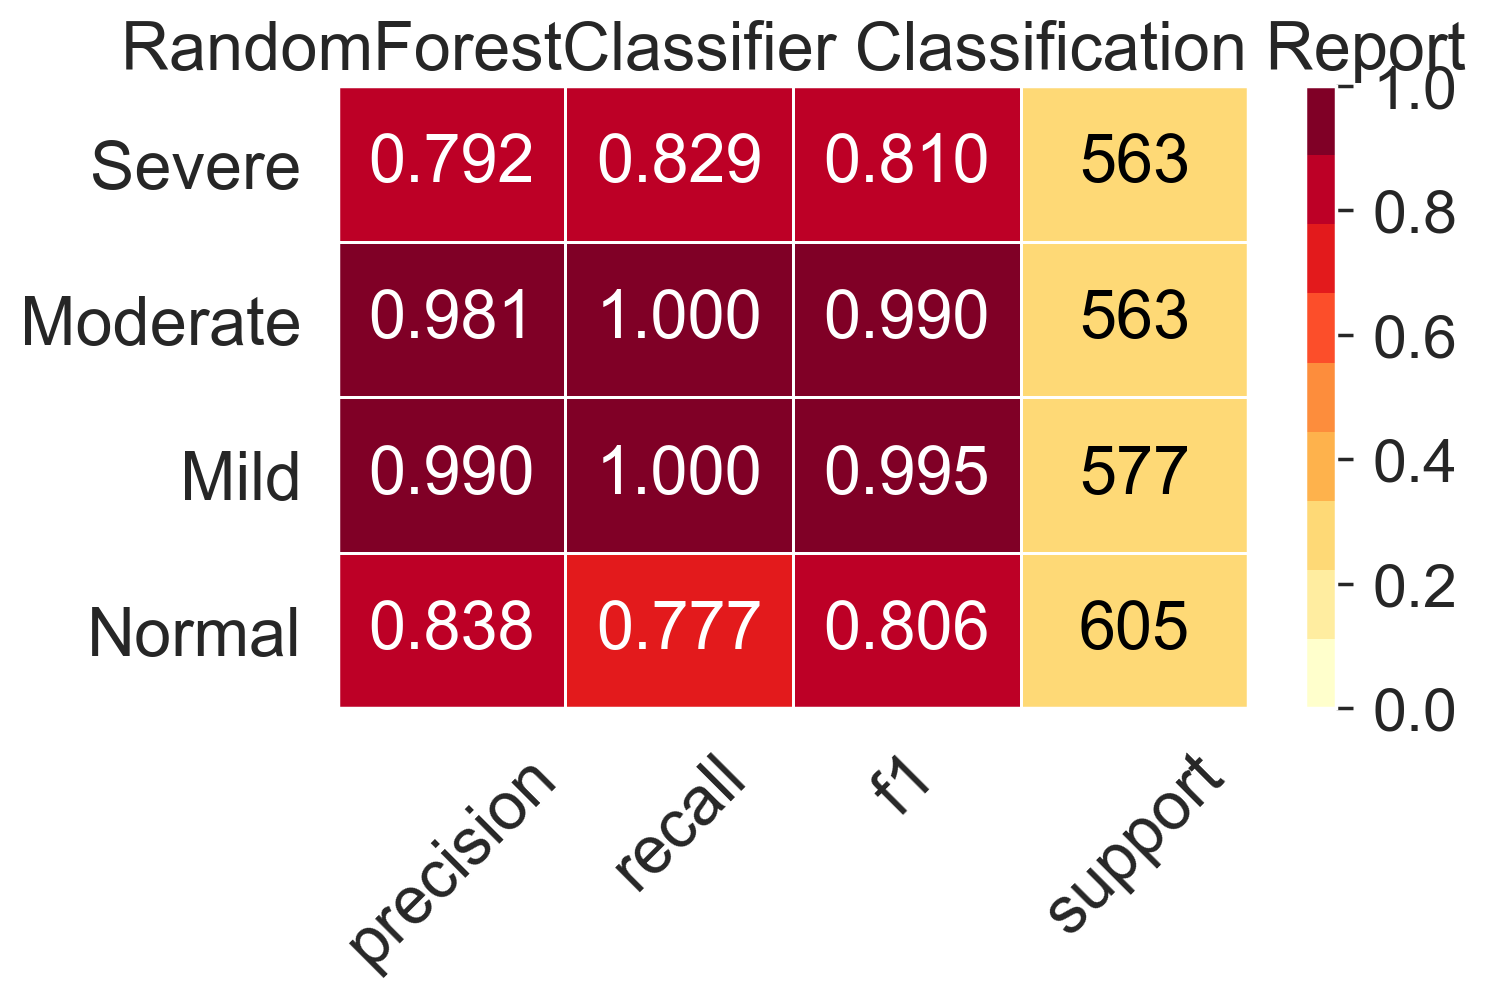

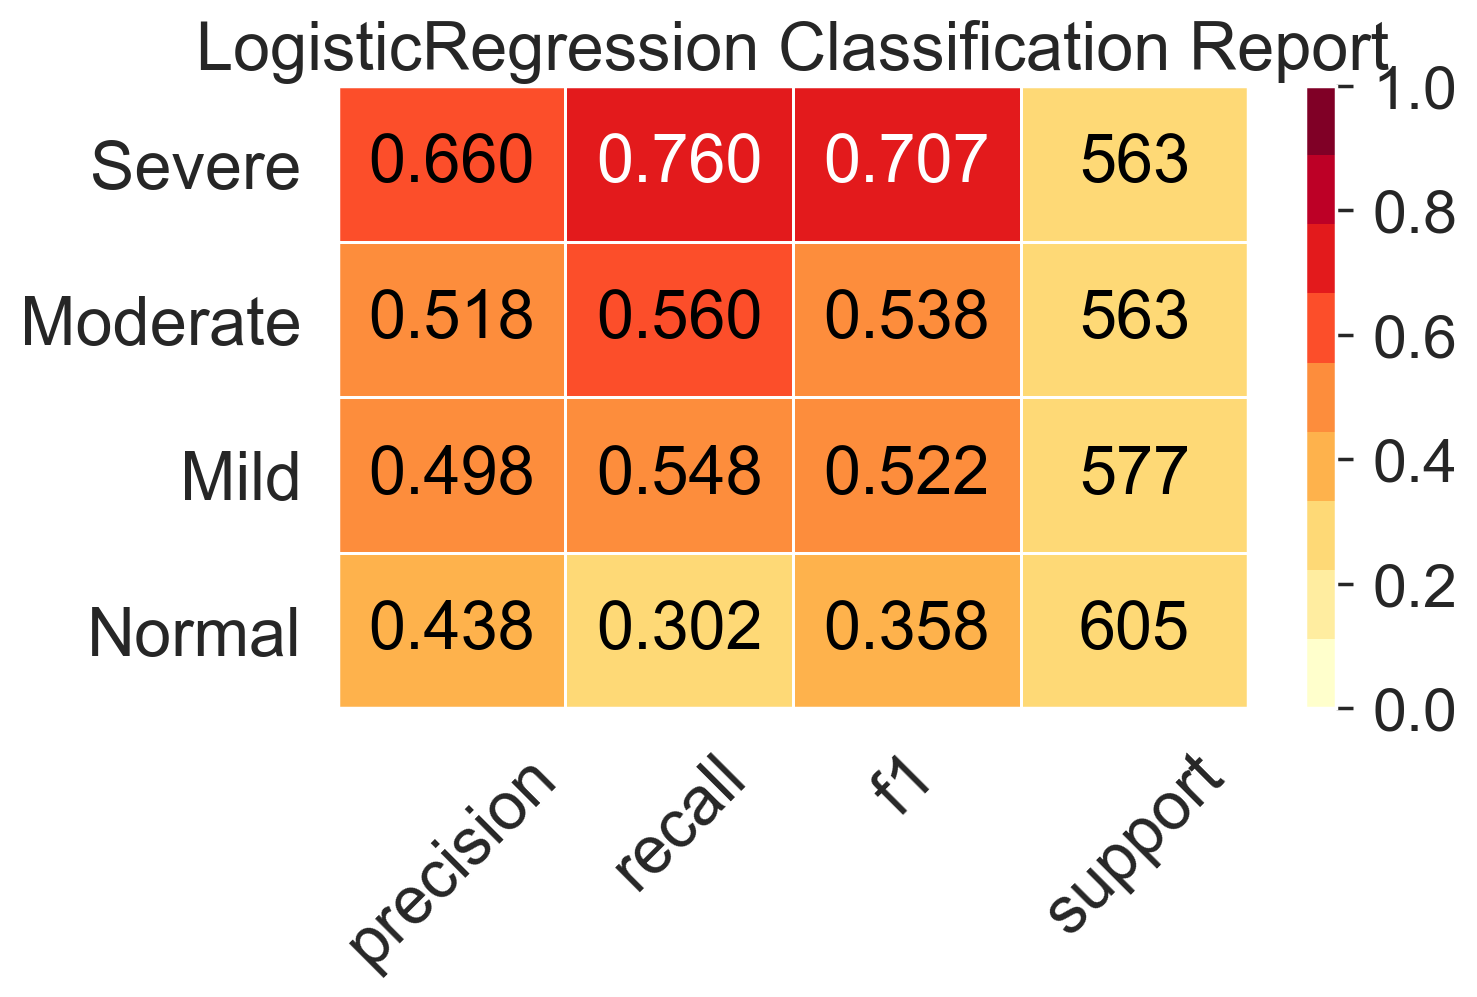

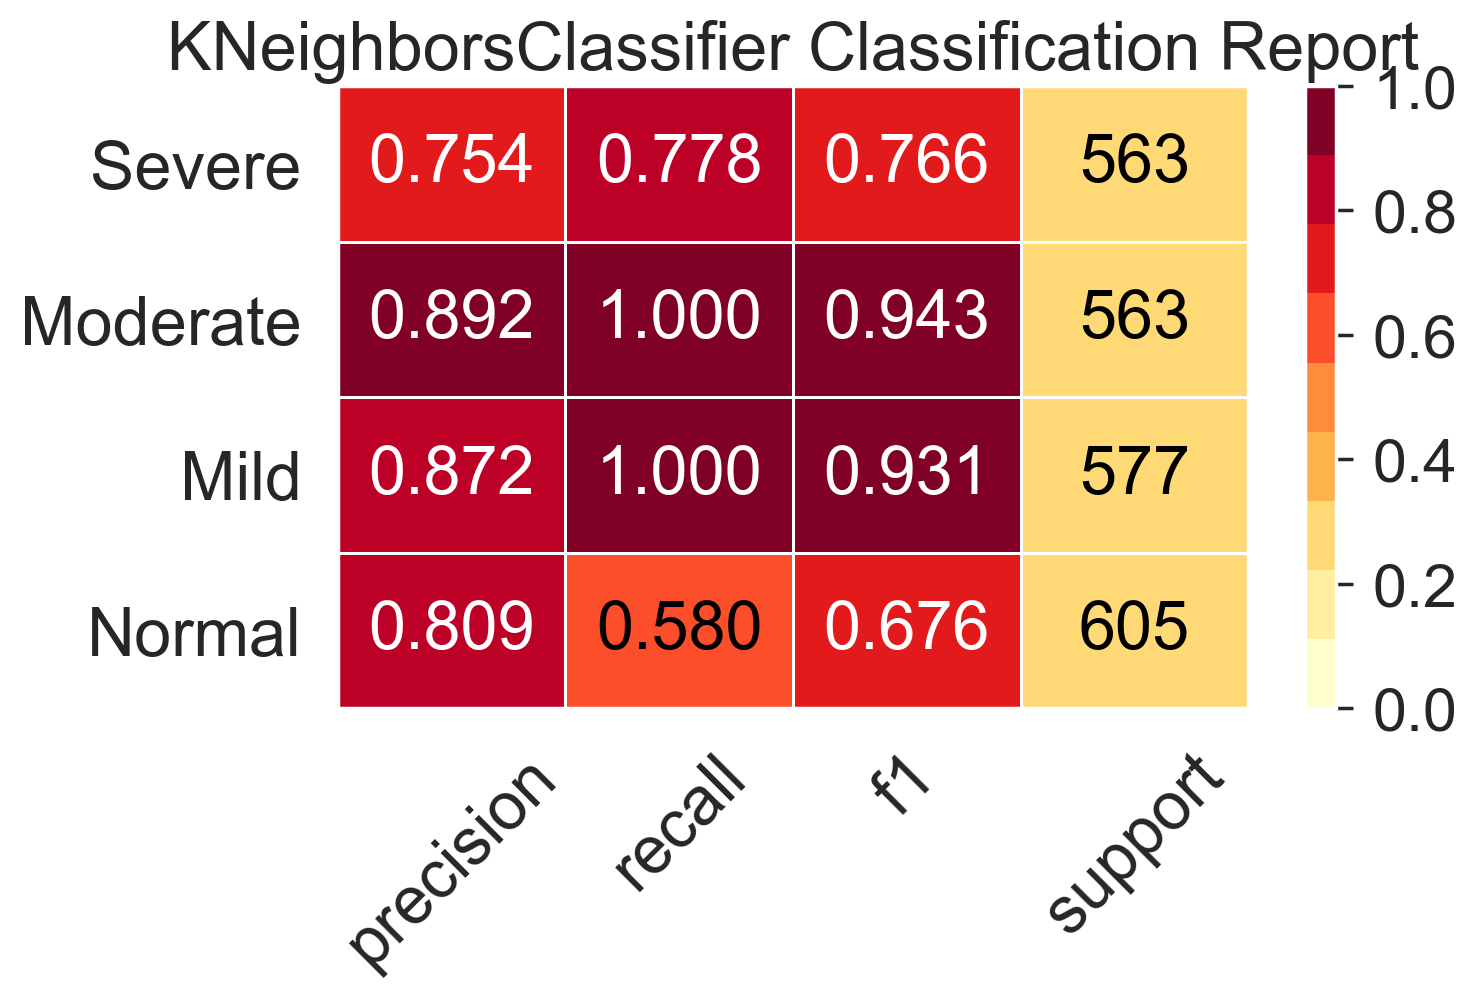

In [235]:
visualization =[CR_viz()]

# GridSearchCV

In [206]:
X_train, X_test, y_train, y_test = train_test_split(p, q, test_size=.2)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (9228, 11)
y_train (9228,)
X_test (2308, 11)
y_test (2308,)


In [207]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
y_pred1 = rf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred1)
print(conf_mat)
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))
print(accuracy_score(y_test, y_pred1))

[[470   5   7 123]
 [  0 577   0   0]
 [  0   0 563   0]
 [ 91   1   4 467]]
[[470   5   7 123]
 [  0 577   0   0]
 [  0   0 563   0]
 [ 91   1   4 467]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       605
           1       0.99      1.00      0.99       577
           2       0.98      1.00      0.99       563
           3       0.79      0.83      0.81       563

    accuracy                           0.90      2308
   macro avg       0.90      0.90      0.90      2308
weighted avg       0.90      0.90      0.90      2308

0.8999133448873483


In [208]:
cm_df = pd.DataFrame(conf_mat,
                     index = ['Normal','Mild','Moderate','Severe'], 
                     columns = ['Normal','Mild','Moderate','Severe'])

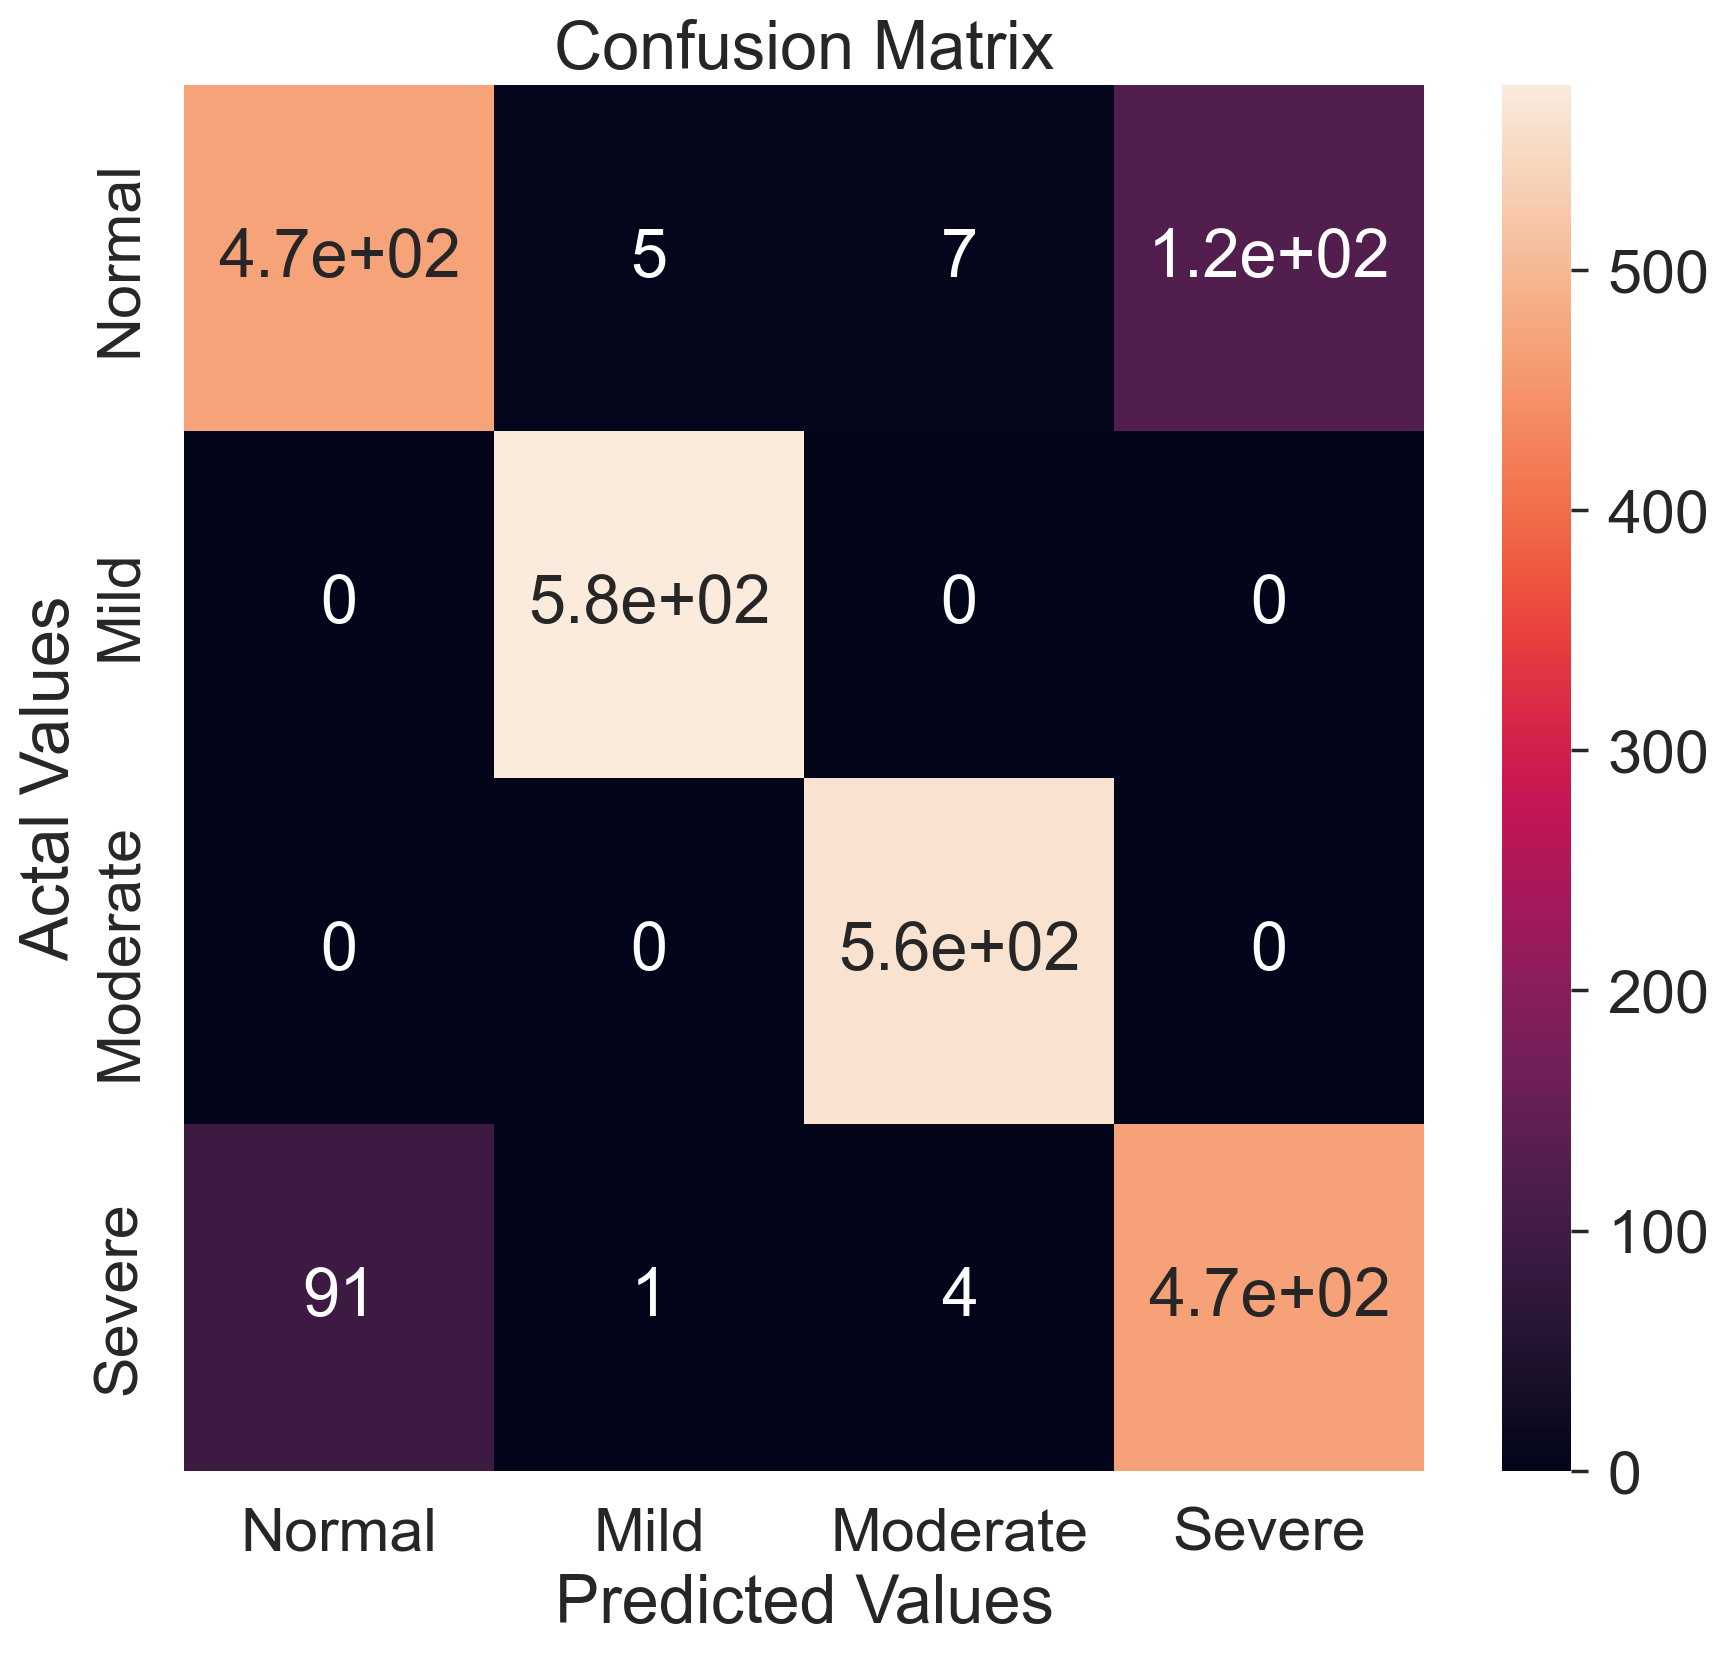

In [209]:
plt.figure(figsize=(10,9))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

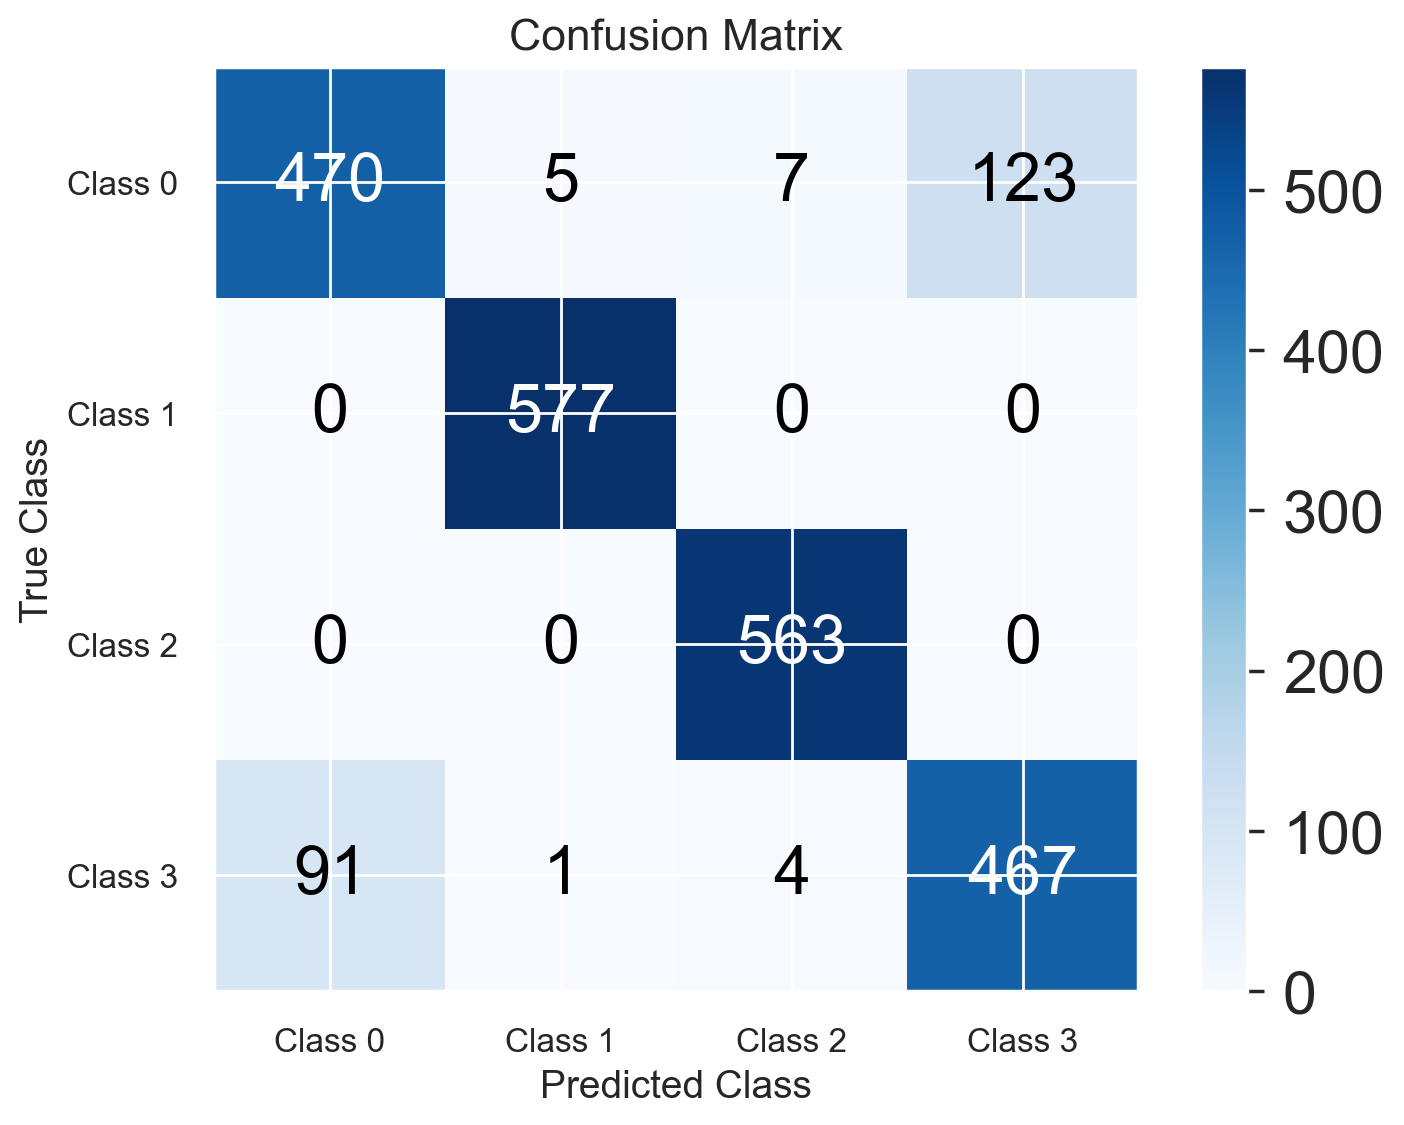

In [210]:
# Define class labels
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred1)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm, cmap='Blues')

# Add color bar
cbar = ax.figure.colorbar(im, ax=ax)

# Set tick labels and axis labels
ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names, fontsize=12)
ax.set_yticklabels(class_names, fontsize=12)
ax.set_xlabel('Predicted Class', fontsize=14)
ax.set_ylabel('True Class', fontsize=14)

# Add values to the plot
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], '.0f'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# Set title
ax.set_title('Confusion Matrix', fontsize=16)

# Show plot
plt.show()


In [211]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}

In [212]:
rfc = RandomForestClassifier(random_state=42)


In [213]:
from sklearn.model_selection import GridSearchCV

optimizer = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
)

In [214]:
optimizer.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [215]:
print(f'Best Hyperparameters: {optimizer.best_params_}')
print(f'Best Score: {optimizer.best_score_}')

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9007360233949034


In [216]:
best_rfc = RandomForestClassifier(
    n_estimators=optimizer.best_params_['n_estimators'],
    max_depth=optimizer.best_params_['max_depth'],
    min_samples_split=optimizer.best_params_['min_samples_split'],
    random_state=42,
)

In [217]:
best_rfc.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [218]:
y_pred = best_rfc.predict(X_test)


In [219]:
accuracy = accuracy_score(y_test, y_pred)


In [220]:
print(f'Test Accuracy: {accuracy}')


Test Accuracy: 0.9055459272097054


In [221]:
print(confusion_matrix(y_test, y_pred))


[[482   5   6 112]
 [  0 577   0   0]
 [  0   0 563   0]
 [ 90   1   4 468]]


In [222]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       605
           1       0.99      1.00      0.99       577
           2       0.98      1.00      0.99       563
           3       0.81      0.83      0.82       563

    accuracy                           0.91      2308
   macro avg       0.91      0.91      0.91      2308
weighted avg       0.90      0.91      0.90      2308

0.9055459272097054


In [223]:
 print(accuracy_score(y_test, y_pred))

0.9055459272097054


In [224]:
forest = RandomForestClassifier(random_state = 1)
modelF = forest.fit(X_train, y_train)
y_predF = modelF.predict(X_test)

In [225]:
print(accuracy_score(y_test, y_predF))

0.9059792027729636


In [226]:
forestVC = RandomForestClassifier(random_state = 1,
                                  n_estimators = 750,
                                  max_depth = 15, 
                                  min_samples_split = 5,  min_samples_leaf = 1) 
modelVC = forestVC.fit(X_train, y_train) 
y_predVC = modelVC.predict(X_test)


KeyboardInterrupt



In [ ]:
print(accuracy_score(y_test, y_predF))

In [ ]:
print(accuracy_score(y_test, y_predVC))

In [ ]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

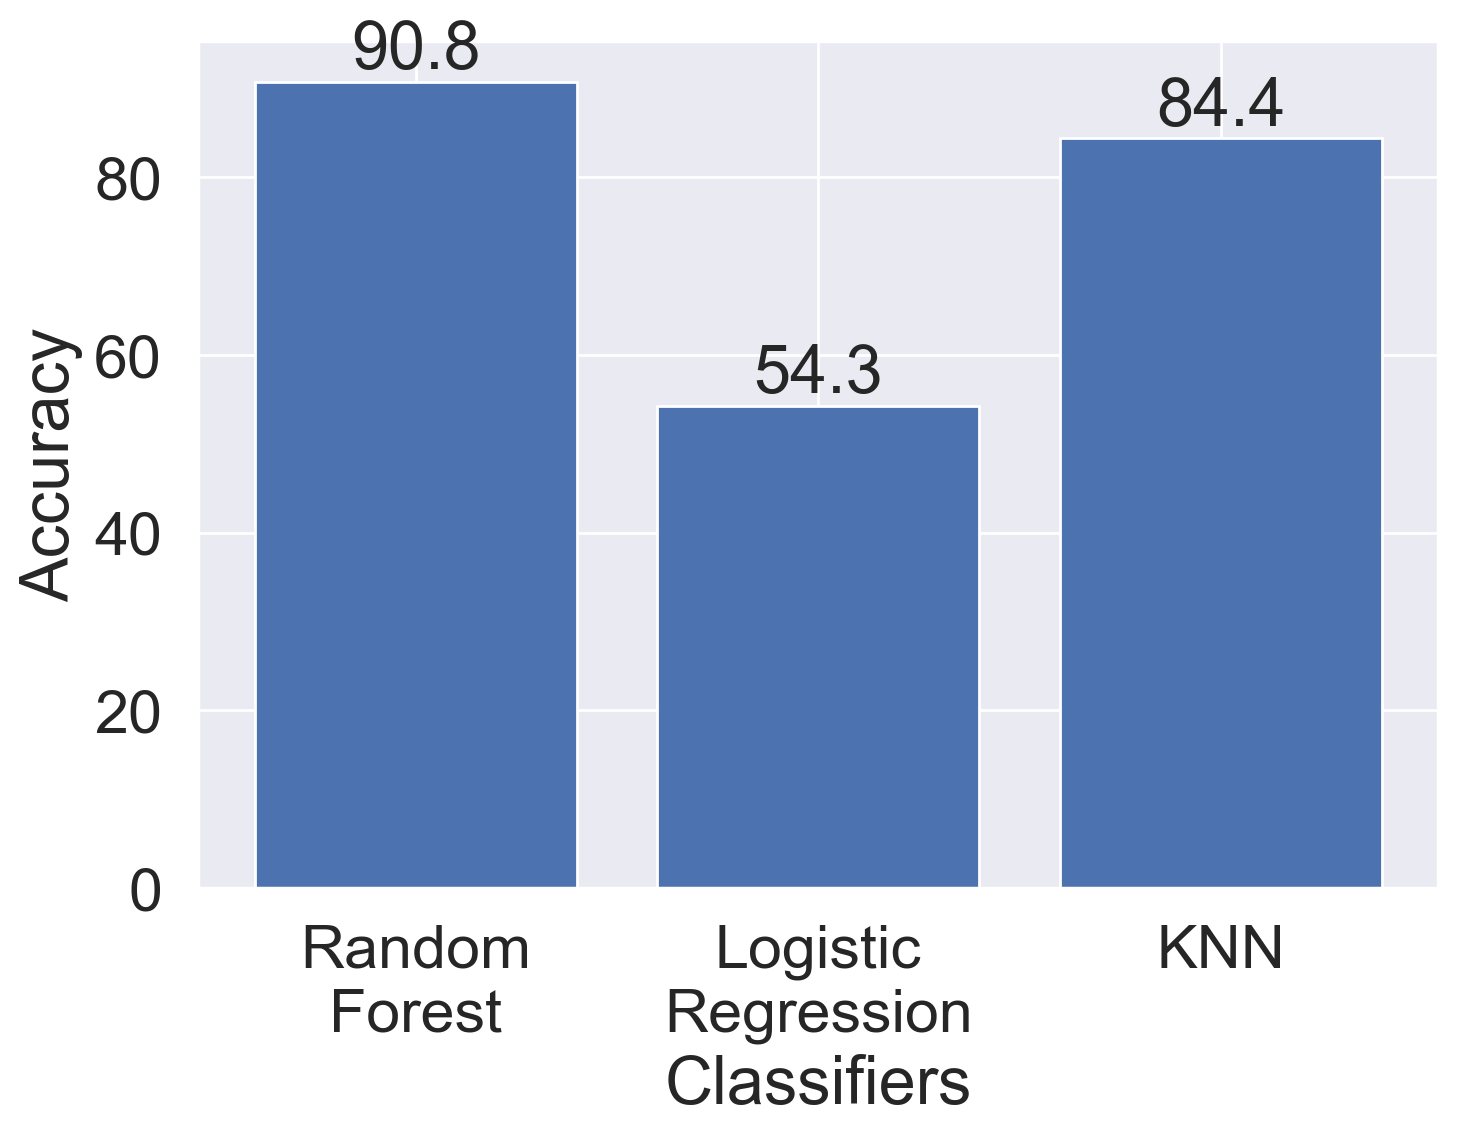

In [227]:
import matplotlib.pyplot as plt


classifier1_acc = 90.8
classifier2_acc = 54.3
classifier3_acc = 84.4

classifiers = ['Random\nForest', 'Logistic\nRegression', 'KNN']
accuracy = [classifier1_acc, classifier2_acc, classifier3_acc]

fig, ax = plt.subplots()
ax.bar(classifiers, accuracy)

# add values to bars
for i, v in enumerate(accuracy):
    ax.annotate(str(v), xy=(i, v), ha='center', va='bottom')
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
# show plot
plt.show()

In [228]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
print(RandomForestClassifier())

RandomForestClassifier()


In [229]:
rfc = RandomForestClassifier()
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
    
}

In [ ]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(train_features,train_label.values.ravel())

In [ ]:
rfc4 = RandomForestClassifier()

forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

clf4 = GridSearchCV(rfc4, forest_params, cv = 10, scoring='accuracy')

clf4.fit(X_train, y_train)

print(clf4.best_params_)

print(clf4.best_score_)

In [237]:
df=pd.read_excel('./datasets/final_sleep_data.xlsx')  
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


In [239]:
p=df.drop('AHILabel',axis=1)
q=df['AHILabel']

In [240]:
X_train, X_test, y_train, y_test = train_test_split(p, q, test_size=.2)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (4166, 11)
y_train (4166,)
X_test (1042, 11)
y_test (1042,)


In [241]:
clf = RandomForestClassifier()
clf.fit(X_train.values, y_train)

RandomForestClassifier()

In [243]:
import pickle
pickle.dump(clf, open('model.pkl', 'wb'))